In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scanpy as sc

from sciso.plot import *

Set plot style

In [2]:
set_nature_style()

## Set paths

In [3]:
# Input
data_dir = Path(r"/media/buglakova/embl_data/data/lipid_isotope/20220411_AB_DKFZACLYac") 
anndata_dir = data_dir / "anndata"
adata_path = anndata_dir / "aclykd_adata_concat_gfp_cond.h5ad"
adata_am_path =anndata_dir / "aclykd_adata_am_concat.h5ad"

# Output
plots_path = data_dir / "classification_plots"
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

## Load anndata

In [4]:
adata = sc.read_h5ad(adata_path)

In [5]:
print("All ions:")
print(adata.var.unlabeled_annotation_id.unique())

All ions:
['C18H36O2-H', 'C18H34O2-H', 'C16H32O2-H', 'C16H30O2-H', 'C14H28O2-H']
Categories (5, object): ['C14H28O2-H', 'C16H30O2-H', 'C16H32O2-H', 'C18H34O2-H', 'C18H36O2-H']


## Fit binomial

In [7]:
adata.obs.index

Index(['13868-S1W1-0', '13869-S1W1-0', '13870-S1W1-0', '13871-S1W1-0',
       '13872-S1W1-0', '13873-S1W1-0', '13874-S1W1-0', '13876-S1W1-0',
       '13877-S1W1-0', '13880-S1W1-0',
       ...
       '8764-S3W8-2', '8765-S3W8-2', '8766-S3W8-2', '8767-S3W8-2',
       '8768-S3W8-2', '8769-S3W8-2', '8771-S3W8-2', '8773-S3W8-2',
       '8774-S3W8-2', '8824-S3W8-2'],
      dtype='object', name='cell_id', length=6257)

In [8]:
fit_binomial_adata(adata)

Ion: C18H36O2-H


/home/buglakova/work/sc_isotope_tracing/sciso/plot.py:204: RuntimeWarning: invalid value encountered in true_divide
  iso_dist_even = (iso_dist_even / np.sum(iso_dist_even))


Ion: C18H34O2-H


/home/buglakova/work/sc_isotope_tracing/sciso/plot.py:204: RuntimeWarning: invalid value encountered in true_divide
  iso_dist_even = (iso_dist_even / np.sum(iso_dist_even))


Ion: C16H32O2-H


/home/buglakova/work/sc_isotope_tracing/sciso/plot.py:204: RuntimeWarning: invalid value encountered in true_divide
  iso_dist_even = (iso_dist_even / np.sum(iso_dist_even))


Ion: C16H30O2-H


/home/buglakova/work/sc_isotope_tracing/sciso/plot.py:204: RuntimeWarning: invalid value encountered in true_divide
  iso_dist_even = (iso_dist_even / np.sum(iso_dist_even))


Ion: C14H28O2-H


/home/buglakova/work/sc_isotope_tracing/sciso/plot.py:204: RuntimeWarning: invalid value encountered in true_divide
  iso_dist_even = (iso_dist_even / np.sum(iso_dist_even))


In [9]:
output_file = anndata_dir / "aclykd_adata_concat_fit.h5ad"
adata.write(output_file.with_suffix(".h5ad"))

In [11]:
adata.obs.condition.value_counts()

ACLY Ol.1 + Wildtype      1598
Wildtype                  1346
ACLYkd Ol.2 + Wildtype    1296
ACLY Ol.1                 1180
ACLYkd Ol.2                837
Name: condition, dtype: int64

## Open adata with binomial already fit

In [4]:
adata_path = anndata_dir / "aclykd_adata_concat_fit.h5ad"
adata = sc.read_h5ad(adata_path)

## Plot distribtuion of some features

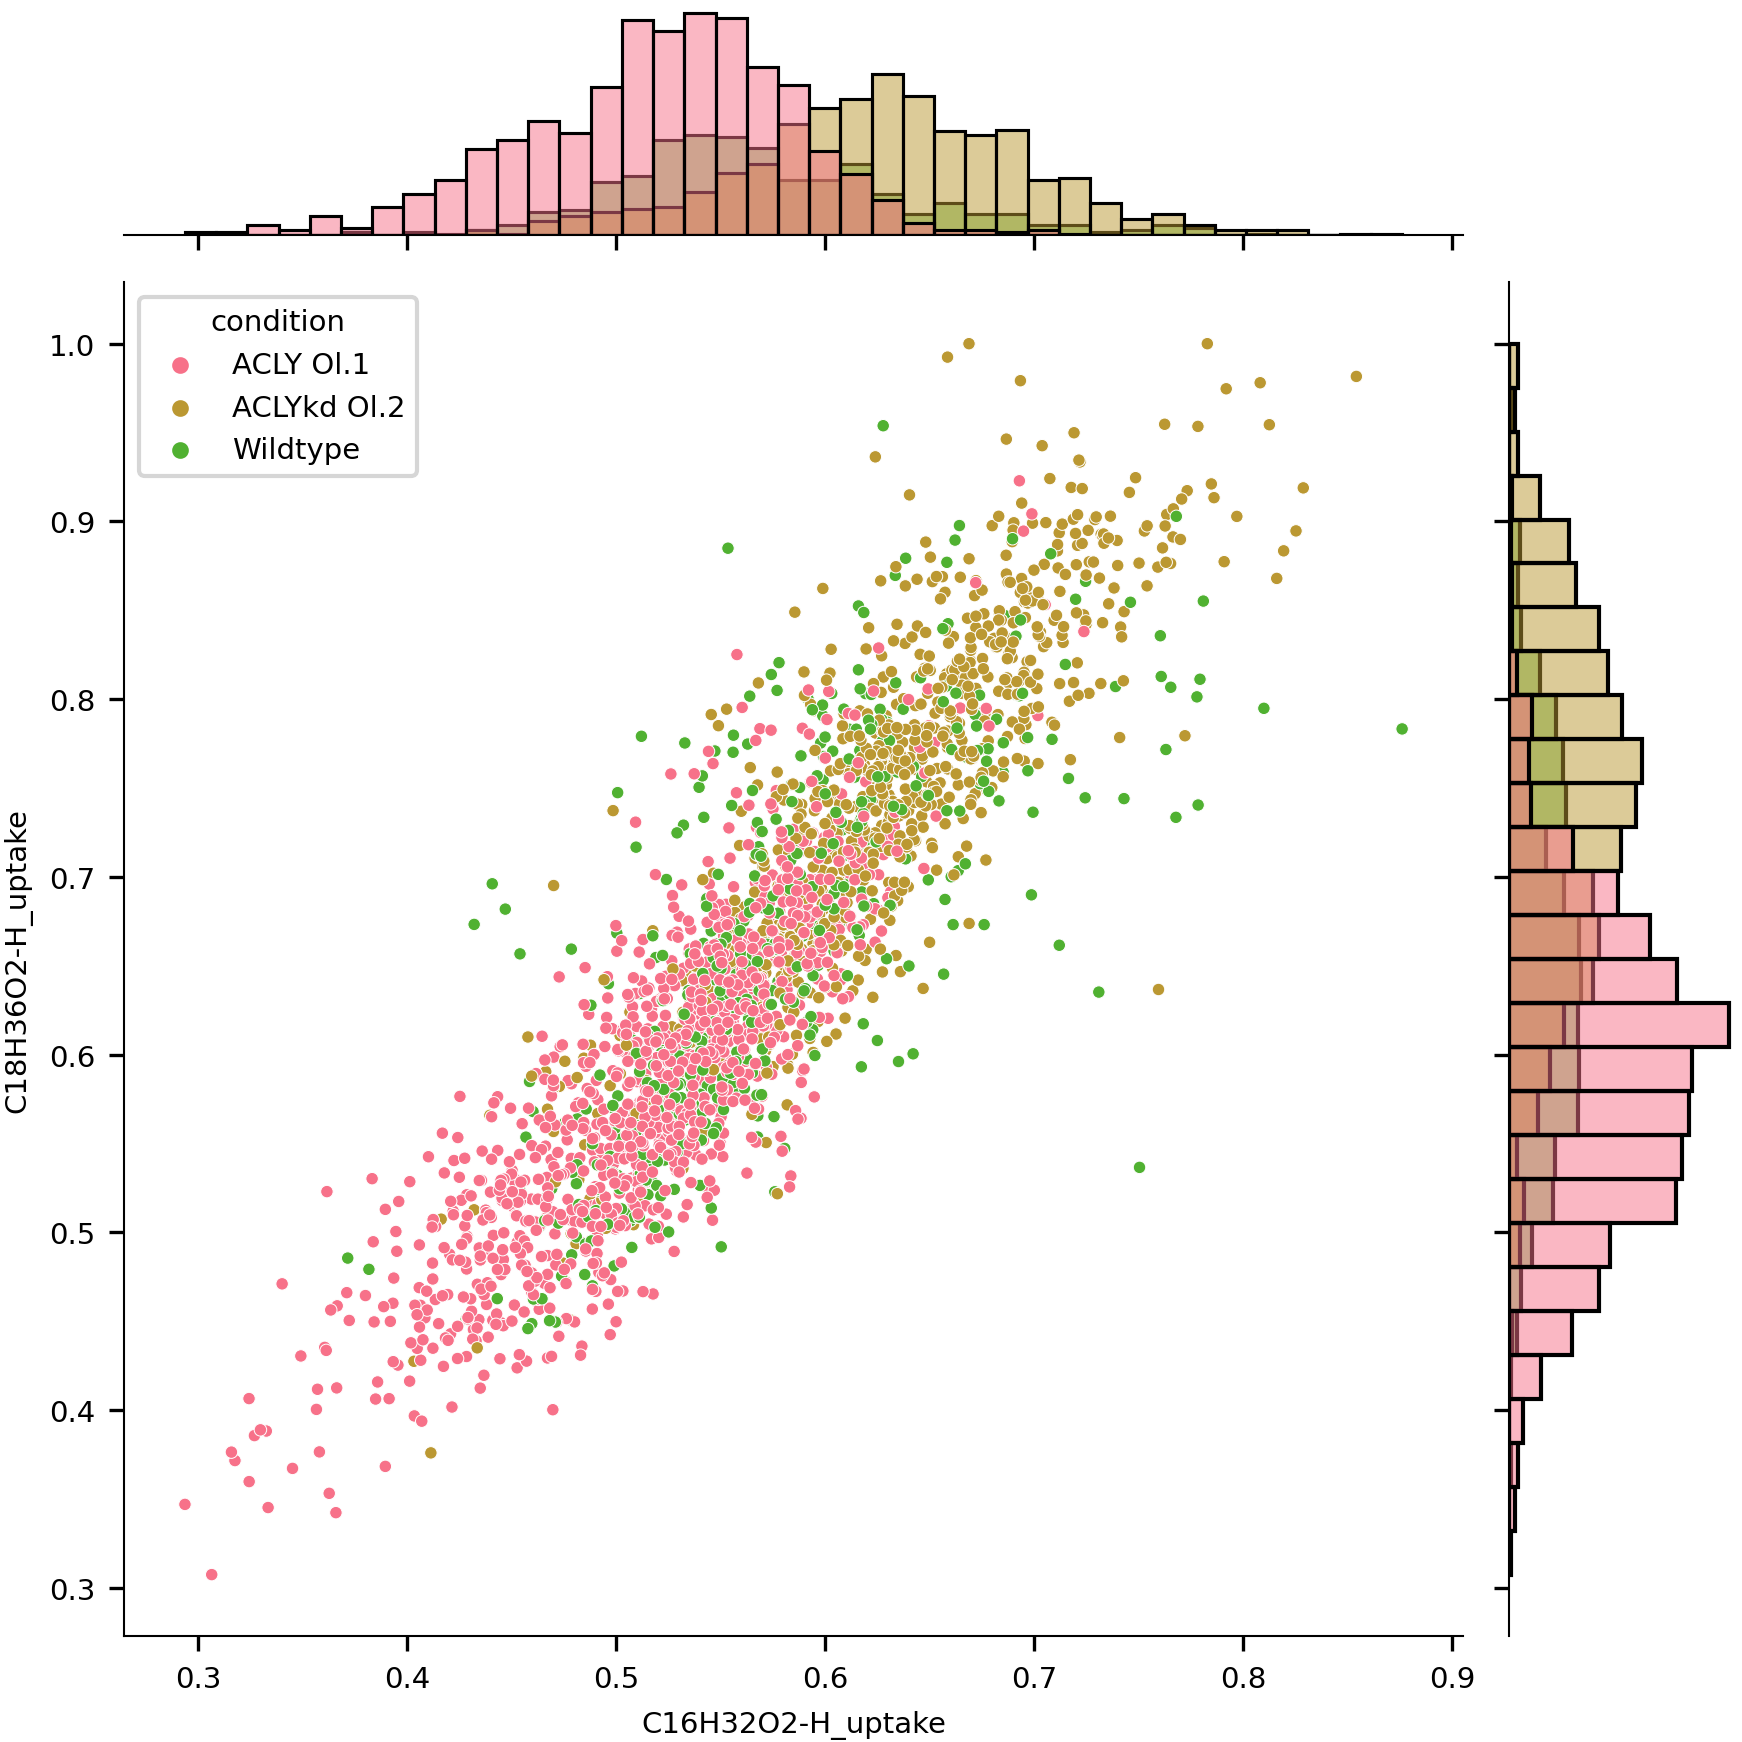

In [12]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_uptake'
y_col = 'C18H36O2-H_uptake'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition")
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("separate_%s_%s_%s.png"%("condition", x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s_%s.svg"%("condition", x_col, y_col)))


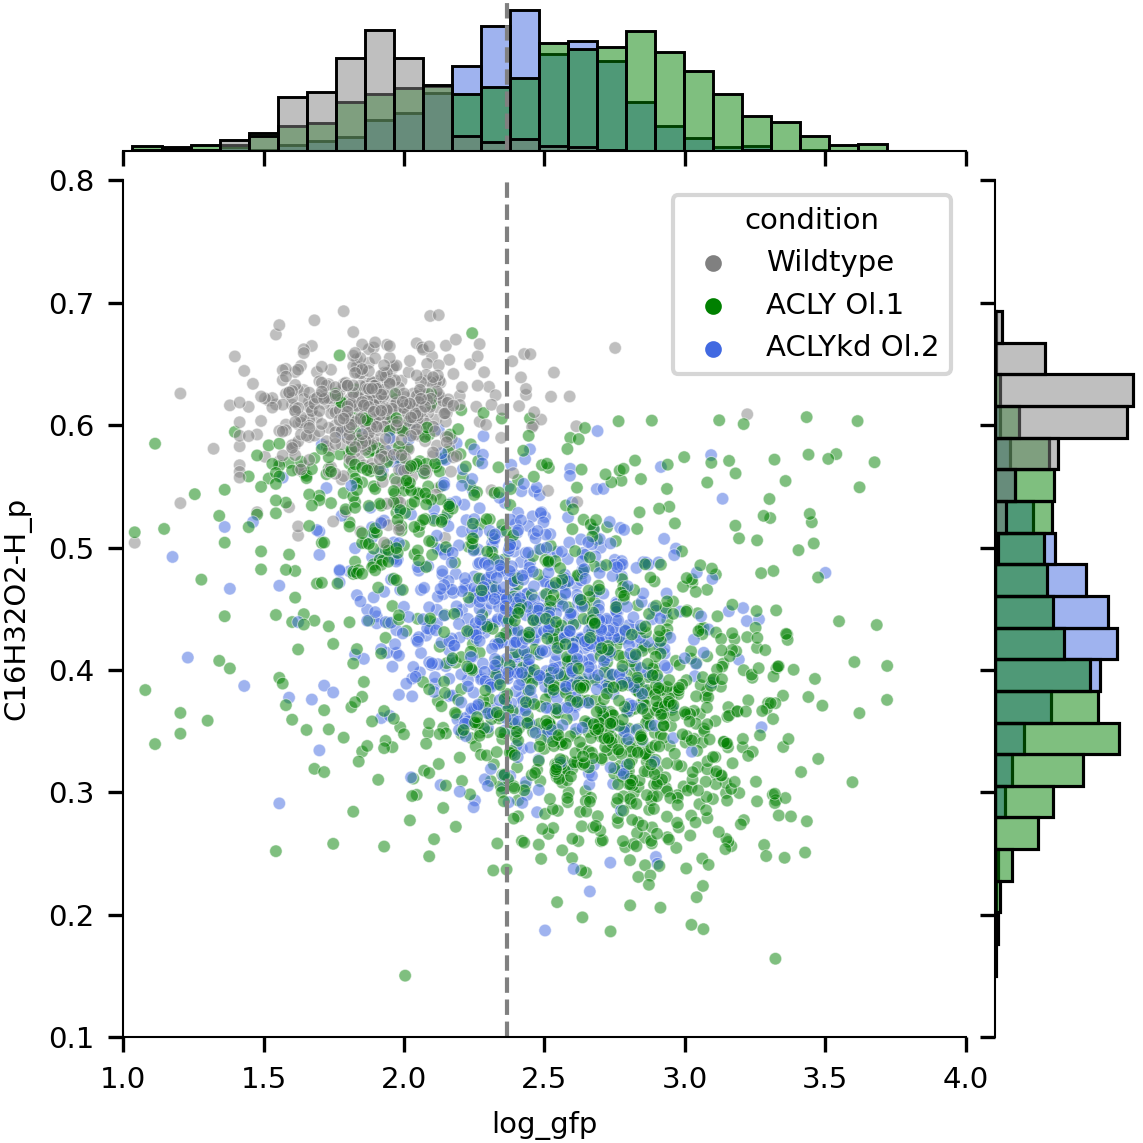

In [32]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'log_gfp'
y_col = 'C16H32O2-H_p'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition", ylim=(0.1, 0.8), xlim=(1, 4), palette=["grey", "green", "royalblue"], hue_order=["Wildtype", "ACLY Ol.1", "ACLYkd Ol.2"], height=4)
p.plot_joint(sns.scatterplot, alpha=0.5)
p.plot_marginals(sns.histplot)
p.refline(x=adata.obs[adata.obs.gfp_class == 0].log_gfp.max(), label="GFP intensity threshold")

plt.savefig(plots_path / ("separate_%s_%s_%s.png"%("condition", x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s_%s.svg"%("condition", x_col, y_col)))

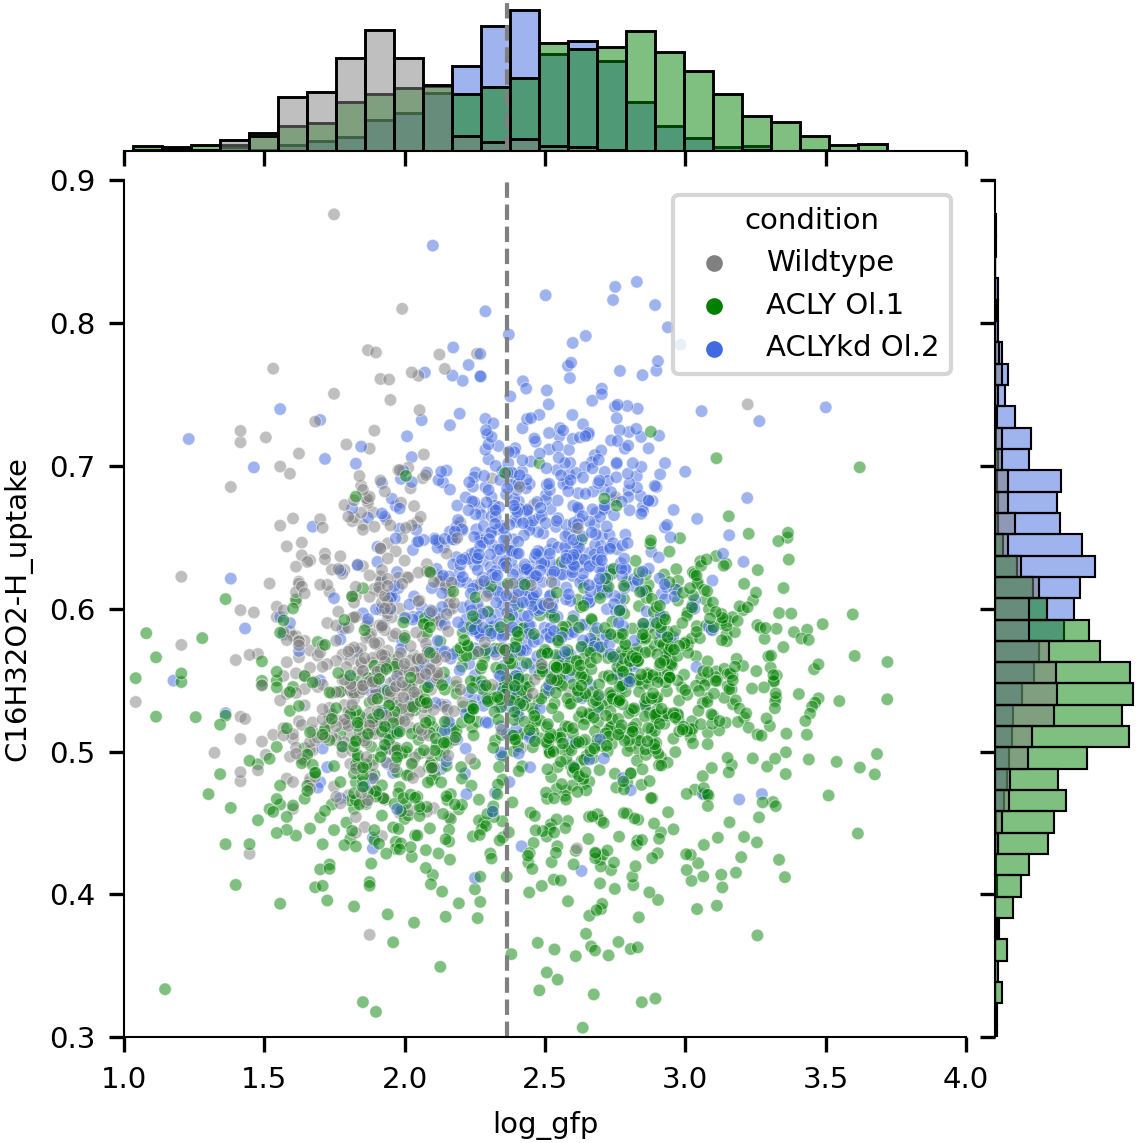

In [33]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'log_gfp'
y_col = 'C16H32O2-H_uptake'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition", ylim=(0.3, 0.9), xlim=(1, 4), palette=["grey", "green", "royalblue"], hue_order=["Wildtype", "ACLY Ol.1", "ACLYkd Ol.2"], height=4)
p.plot_joint(sns.scatterplot, alpha=0.5)
p.plot_marginals(sns.histplot)
p.refline(x=adata.obs[adata.obs.gfp_class == 0].log_gfp.max(), label="GFP intensity threshold")

plt.savefig(plots_path / ("separate_%s_%s_%s.png"%("condition", x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s_%s.svg"%("condition", x_col, y_col)))

In [26]:
adata.obs[adata.obs.gfp_class == 0].log_gfp.max()

2.3654879848909

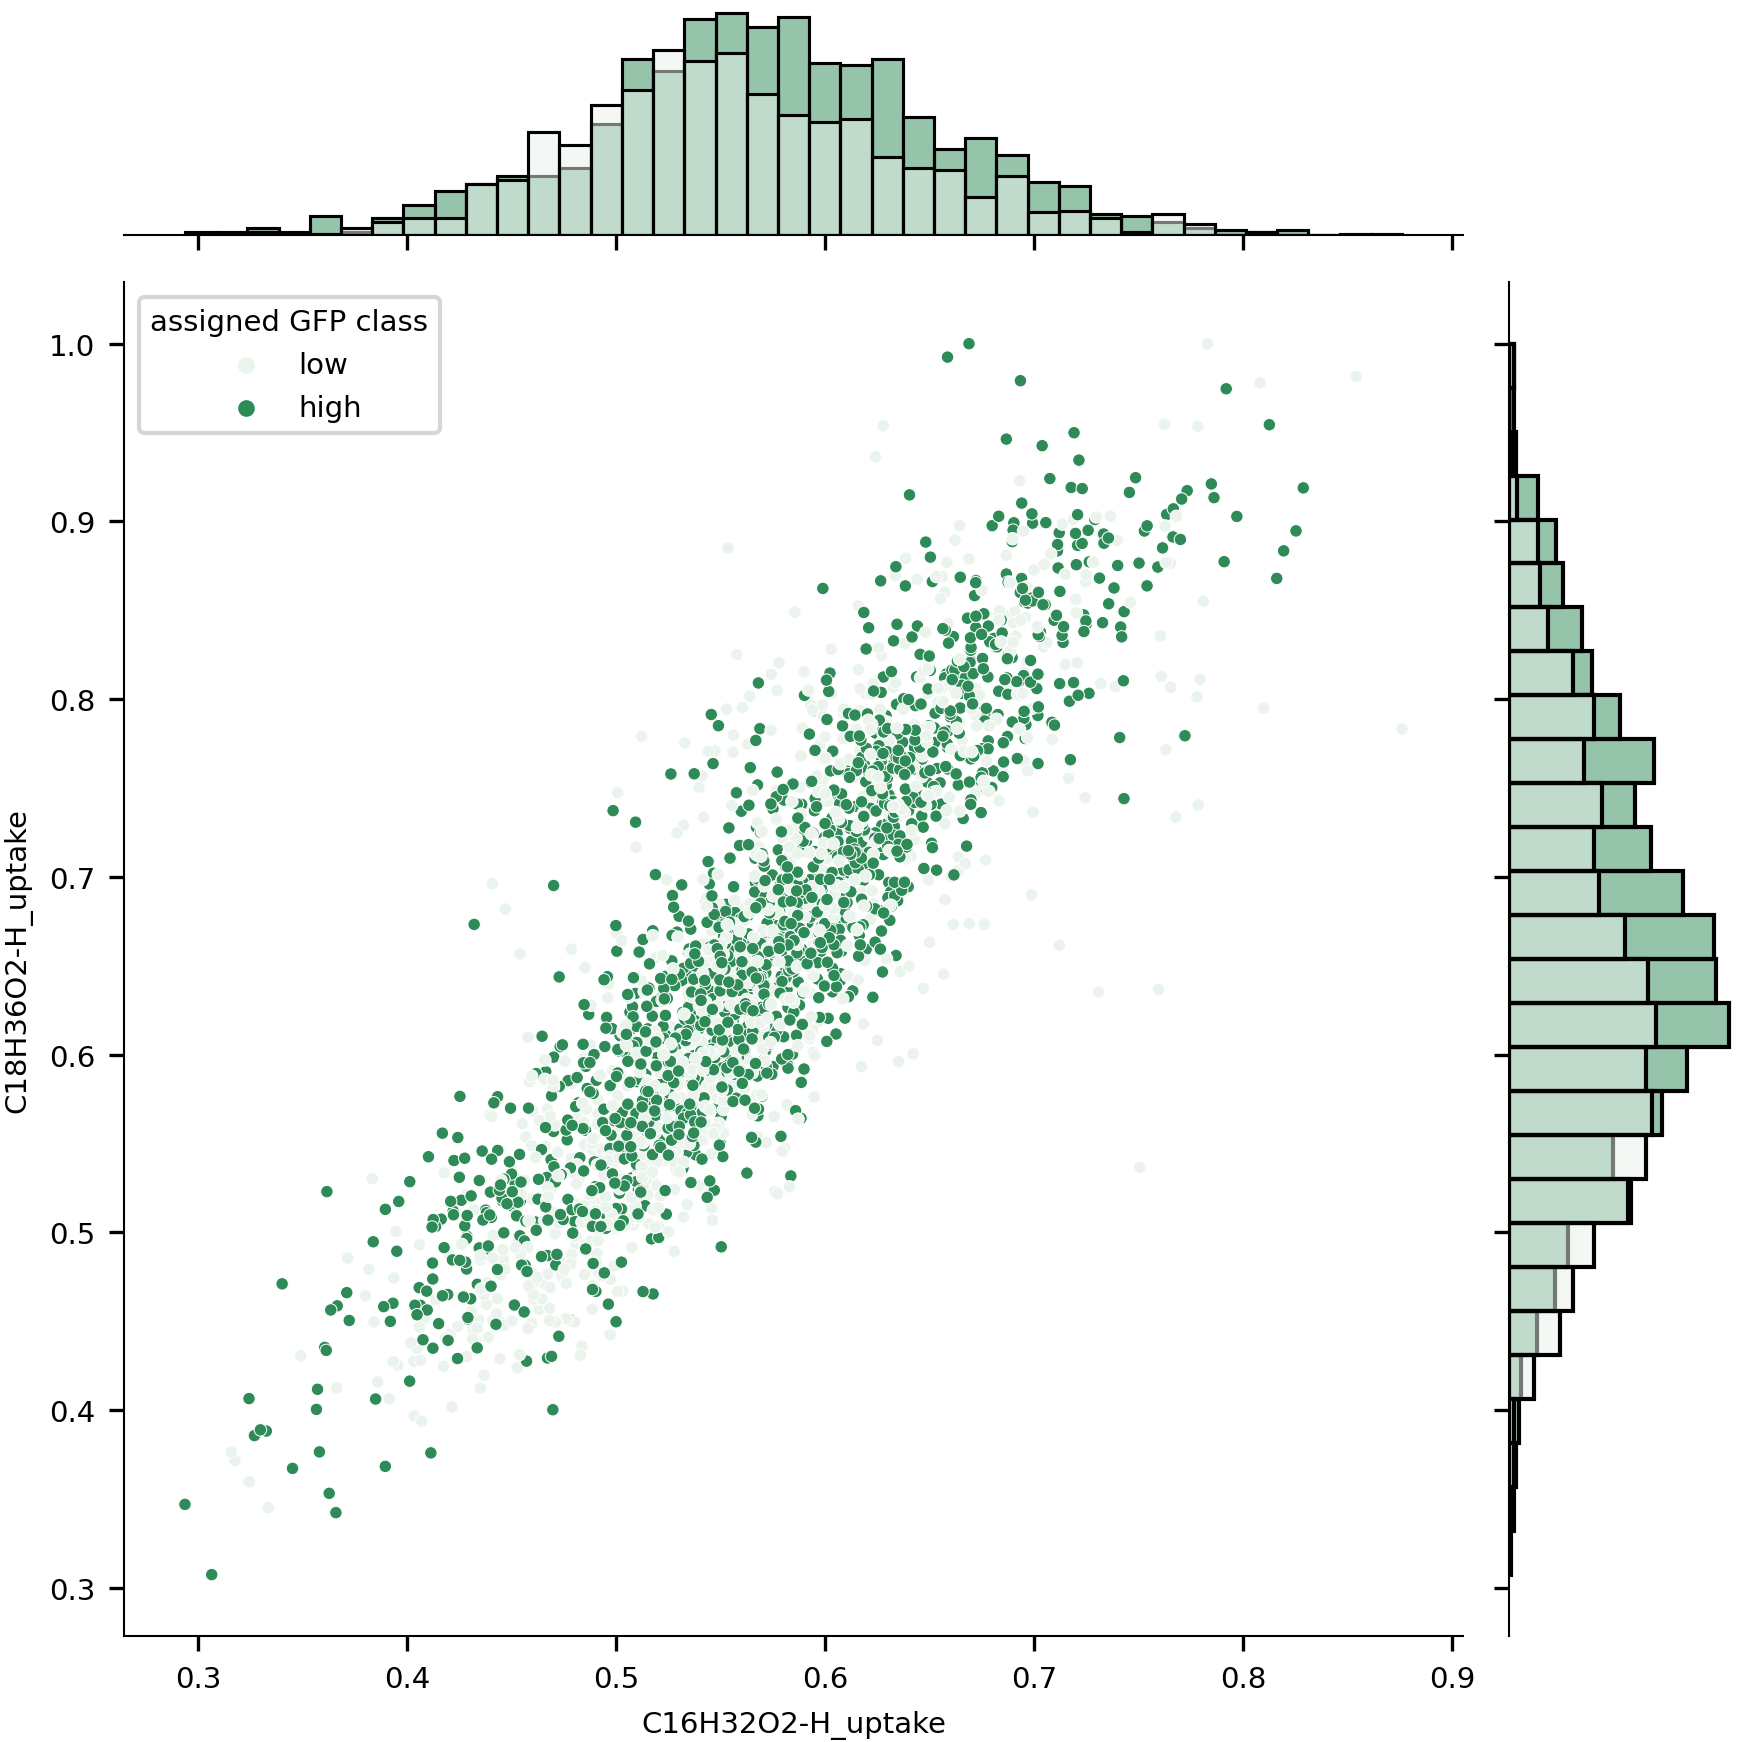

In [13]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_uptake'
y_col = 'C18H36O2-H_uptake'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue='assigned GFP class', palette=sns.light_palette("seagreen", 2), hue_order=["low", "high"])
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)
plt.savefig(plots_path / ("separate_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s.svg"%(x_col, y_col)))

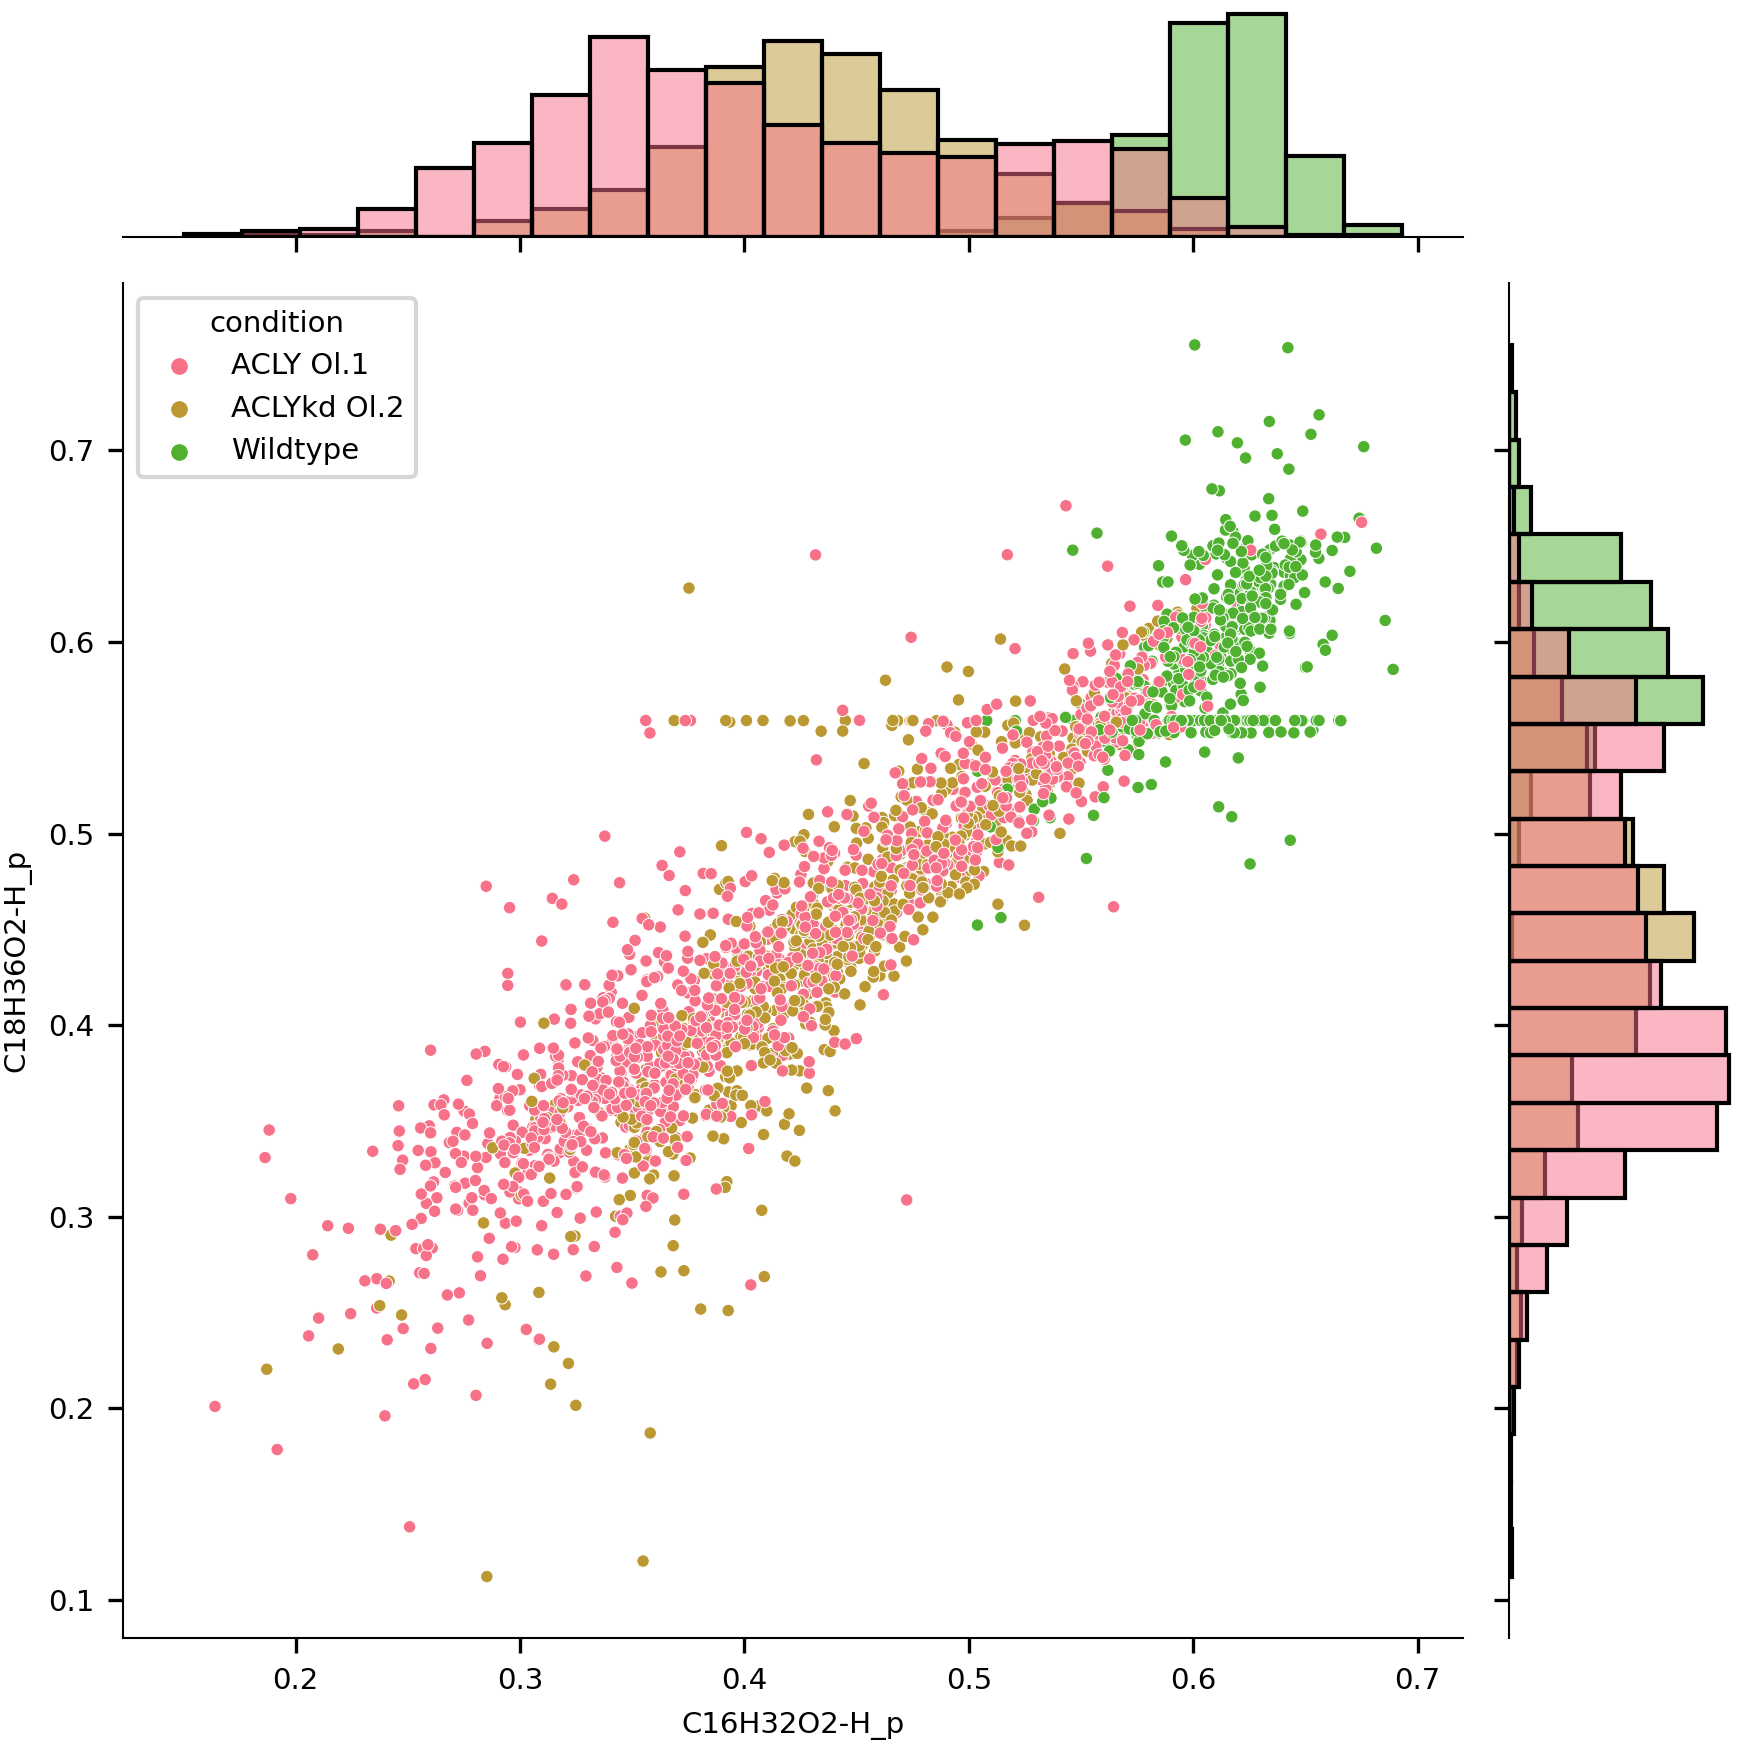

In [14]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_p'
y_col = 'C18H36O2-H_p'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition")
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("separate_condition_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("separate_condition_%s_%s.svg"%(x_col, y_col)))

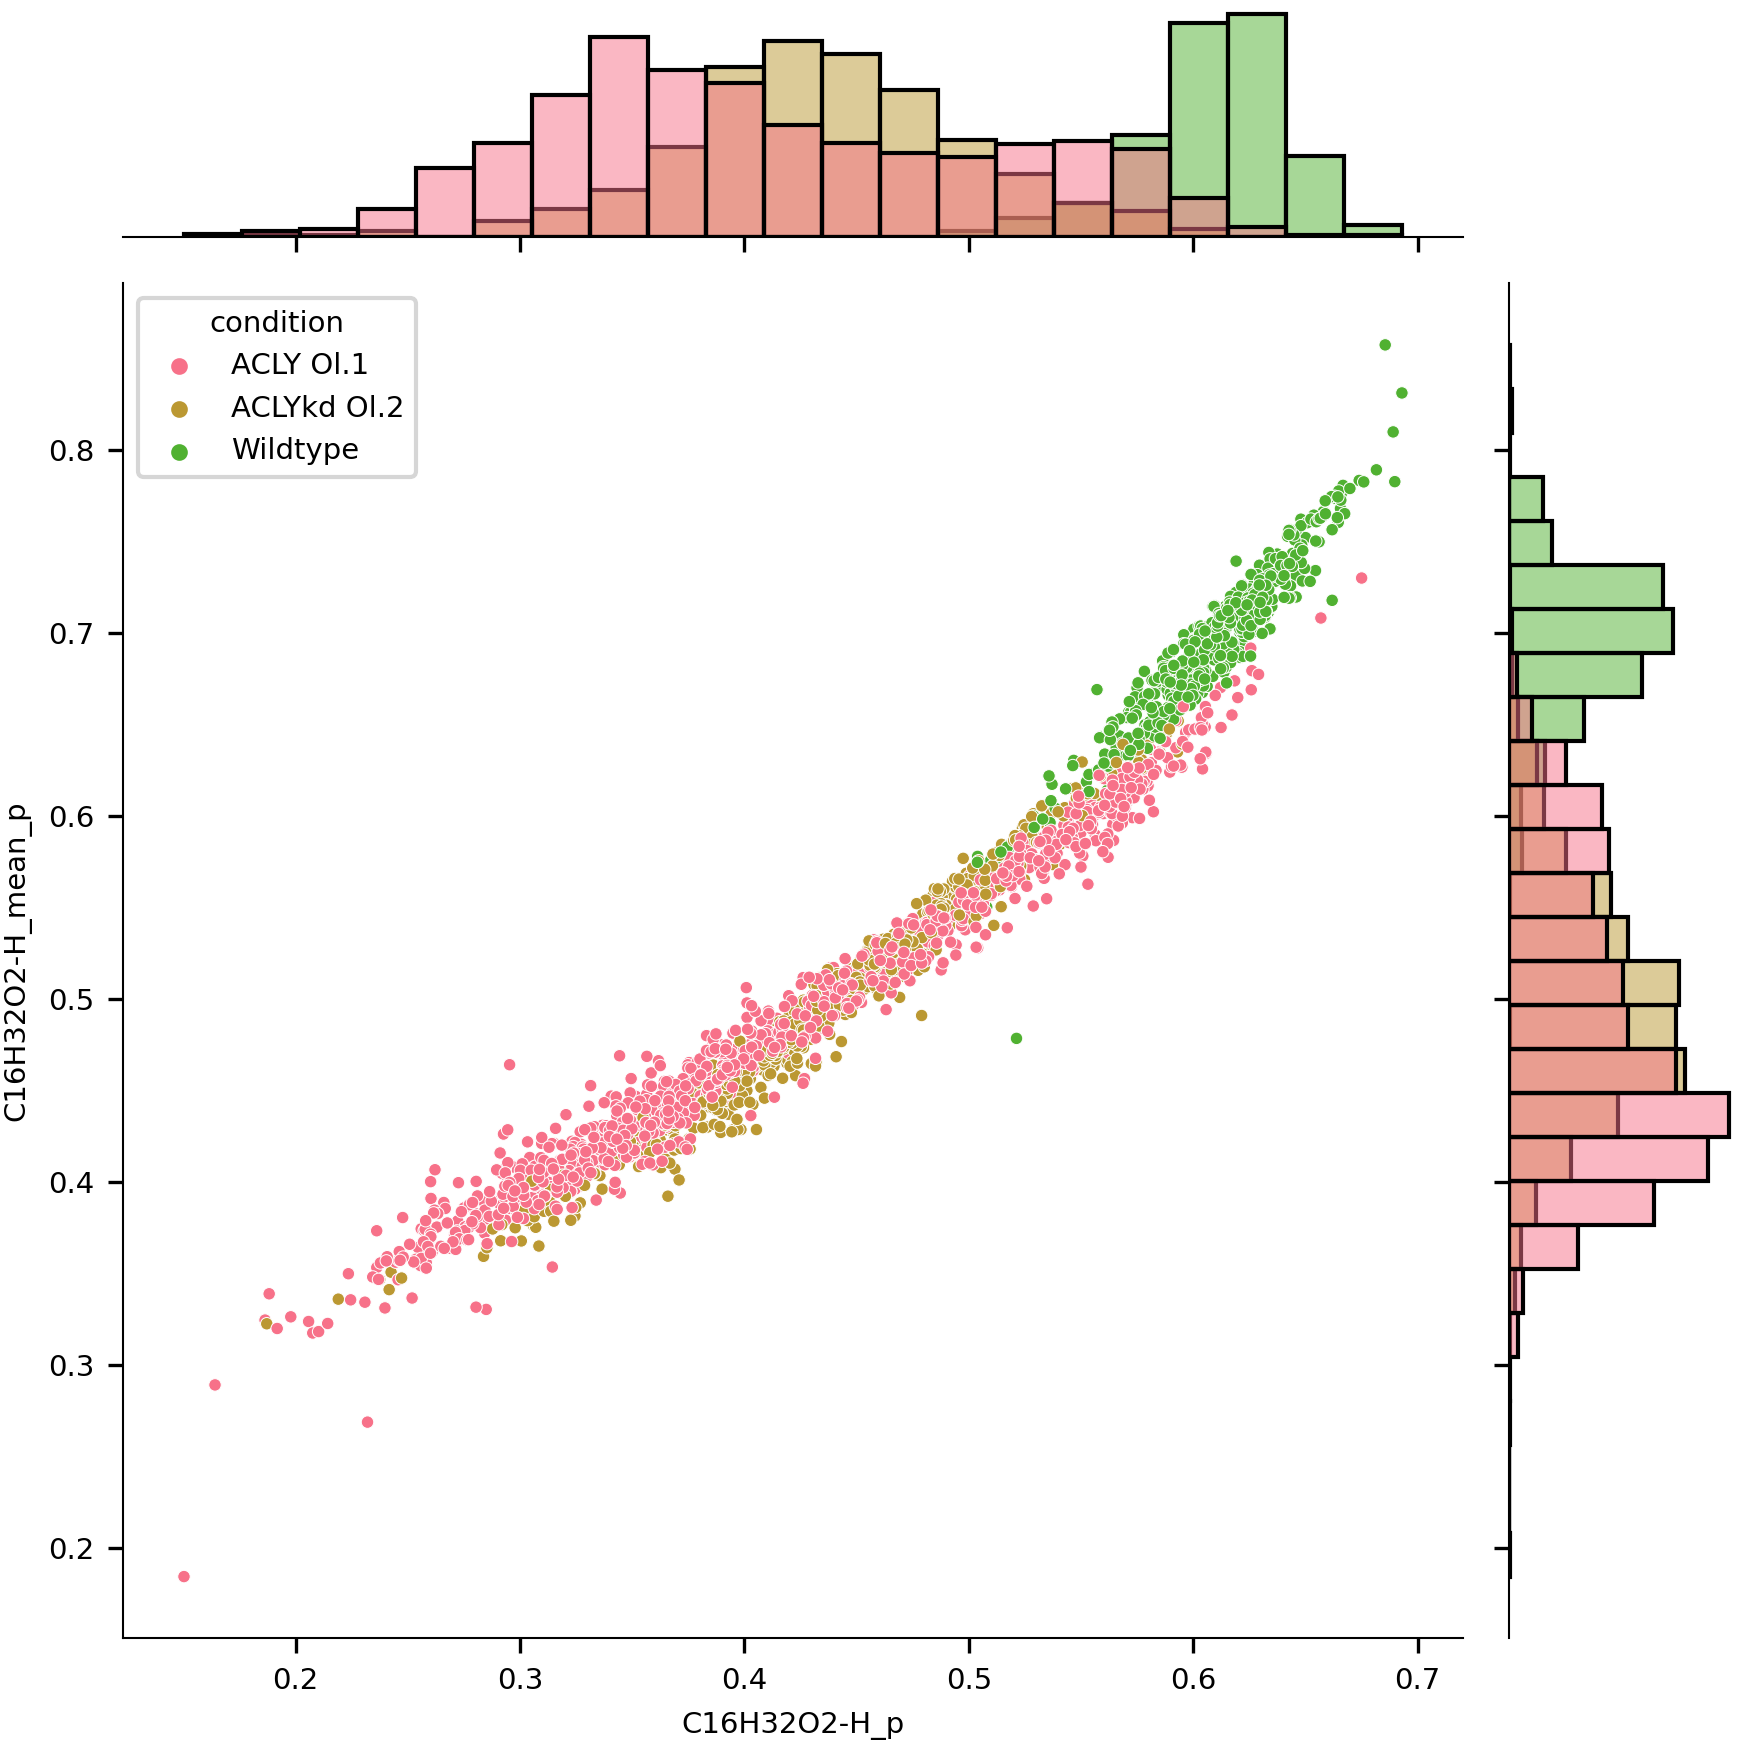

In [15]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_p'
y_col = 'C16H32O2-H_mean_p'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition")
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("separate_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s.svg"%(x_col, y_col)))

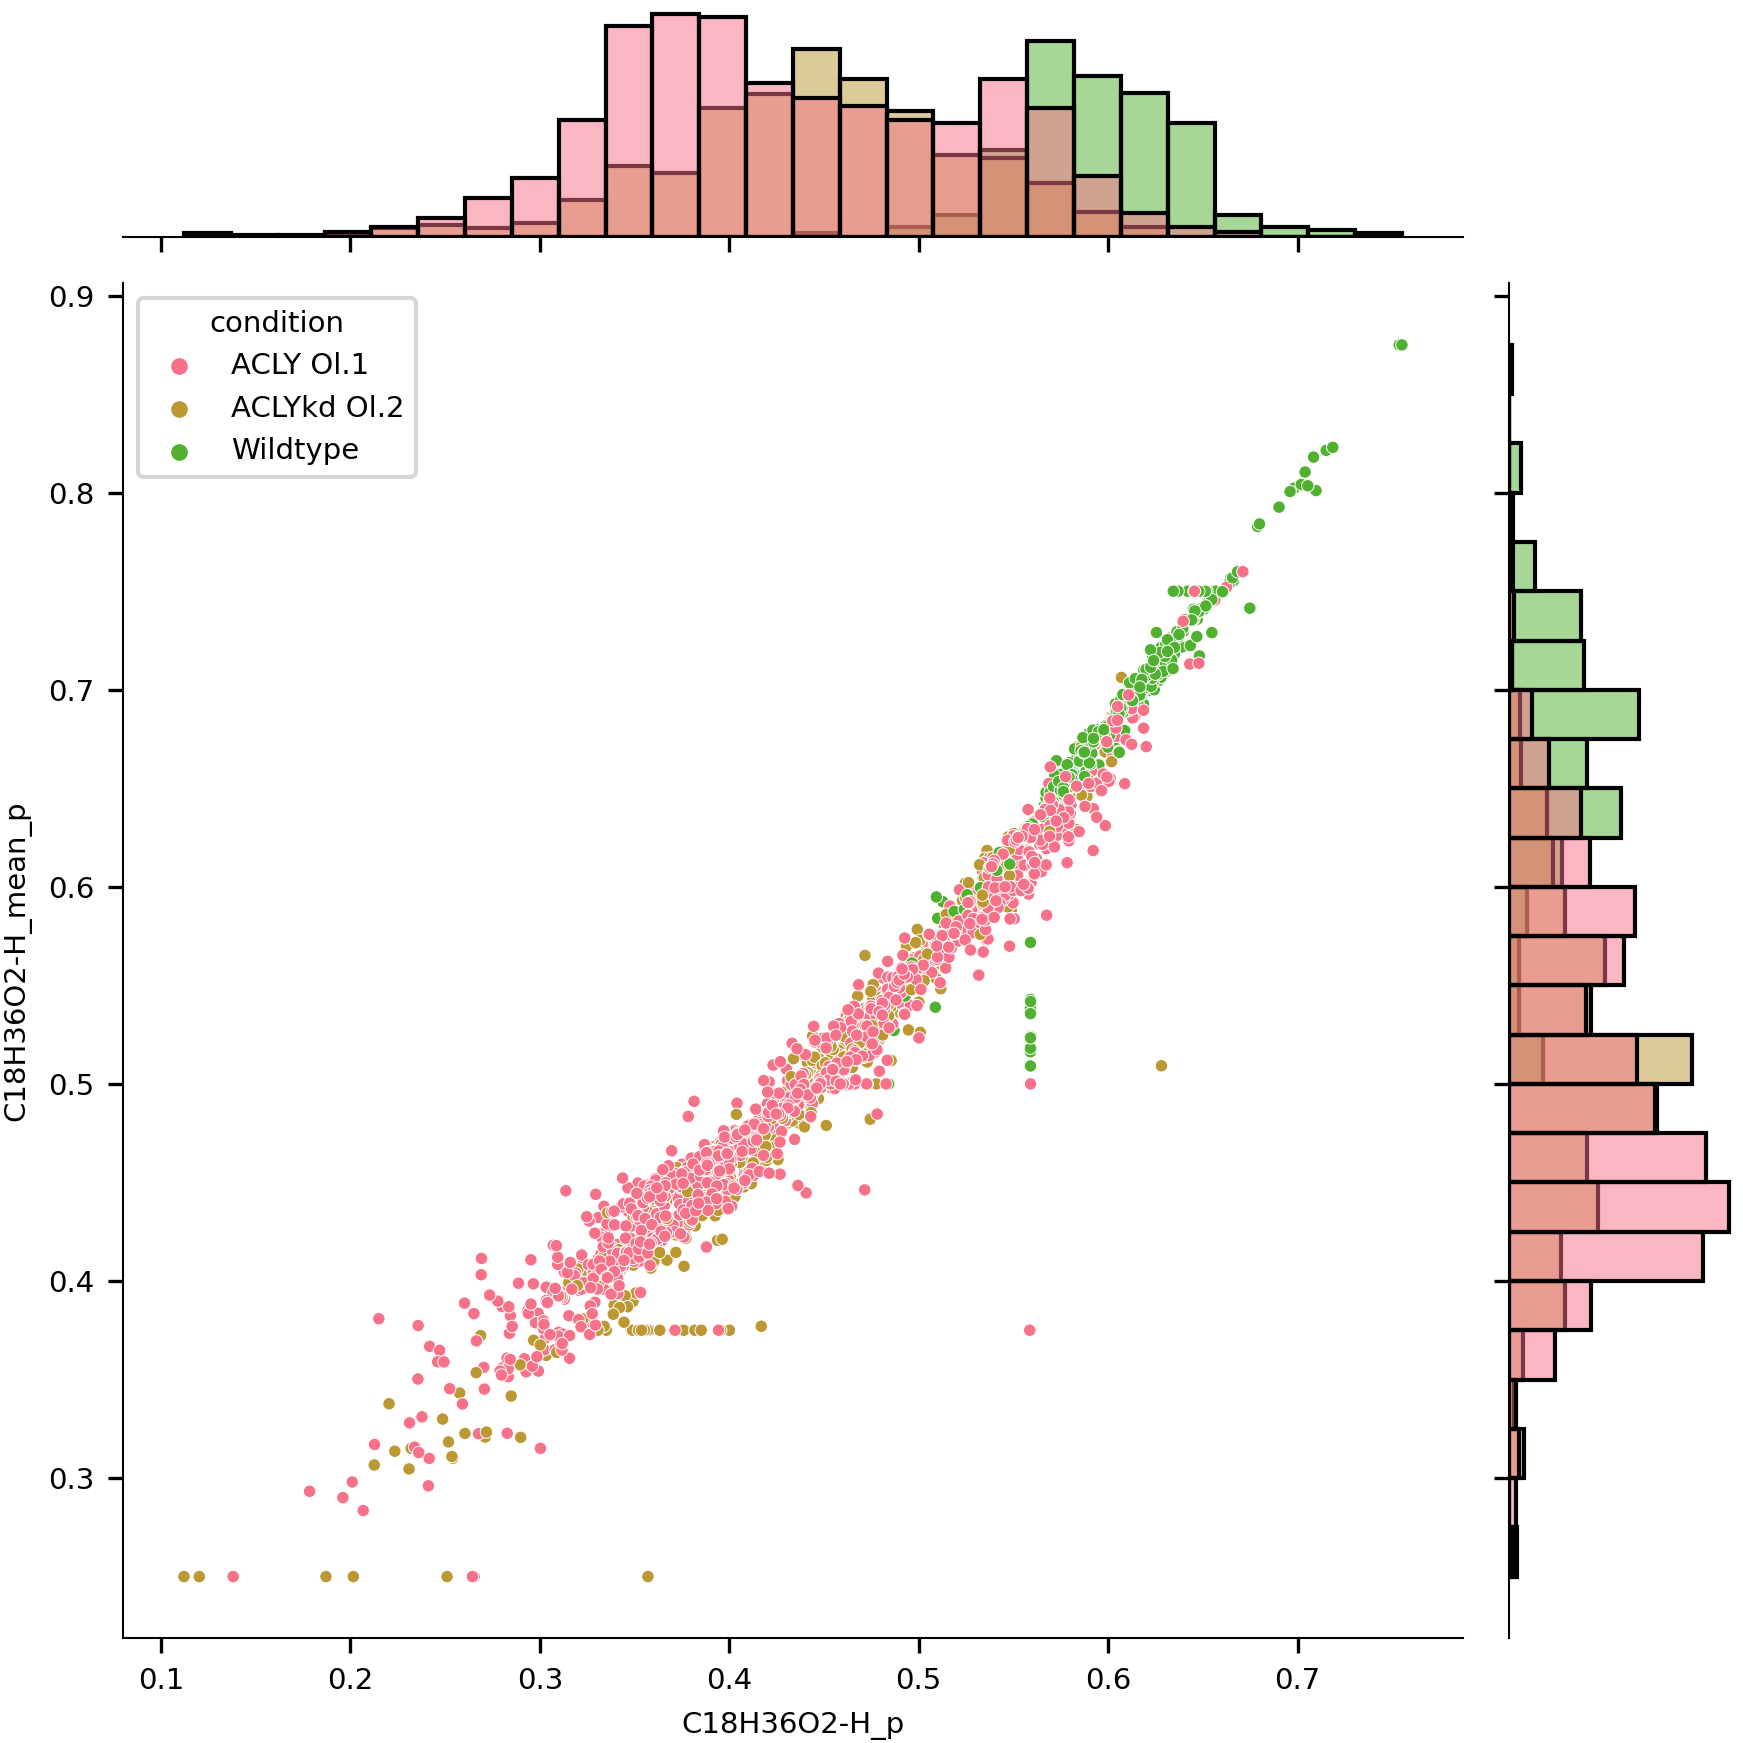

In [17]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C18H36O2-H_p'
y_col = 'C18H36O2-H_mean_p'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue="condition")
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)

plt.savefig(plots_path / ("separate_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("separate_%s_%s.svg"%(x_col, y_col)))

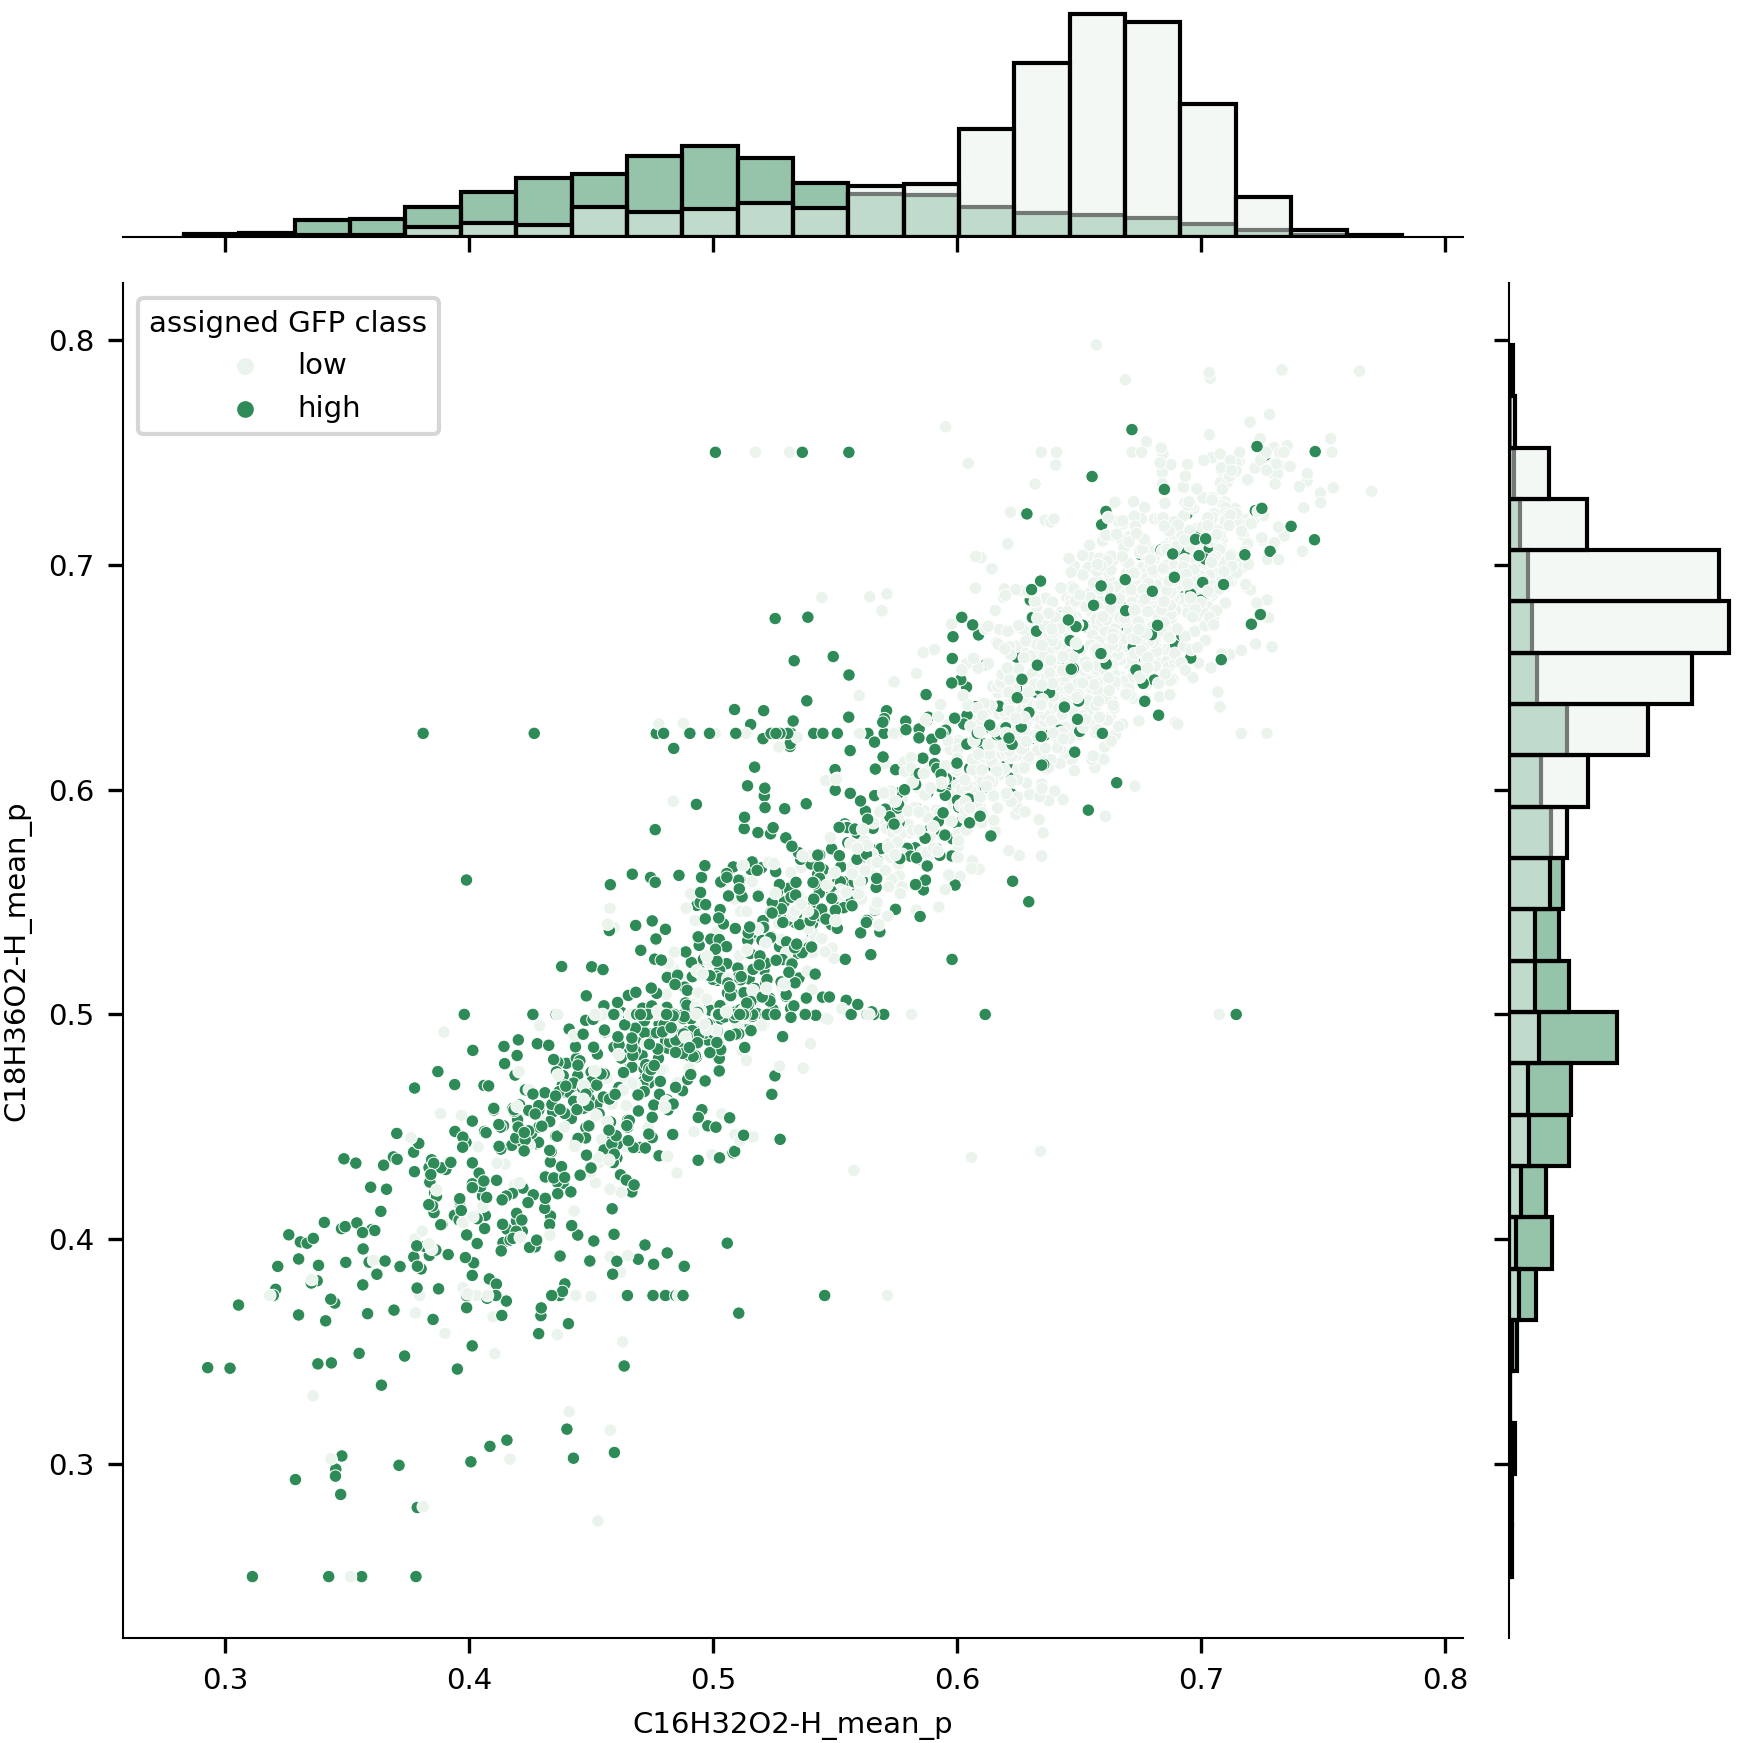

In [18]:
df = adata[(adata.obs.mixture == 1) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'C16H32O2-H_mean_p'
y_col = 'C18H36O2-H_mean_p'

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue='assigned GFP class', palette=sns.light_palette("seagreen", 2), hue_order=["low", "high"])
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot)
plt.savefig(plots_path / ("mixture_%s_%s.png"%(x_col, y_col)))
plt.savefig(plots_path / ("mixture_%s_%s.svg"%(x_col, y_col)))

## Plot distributions for individual cells

[1. 0.]


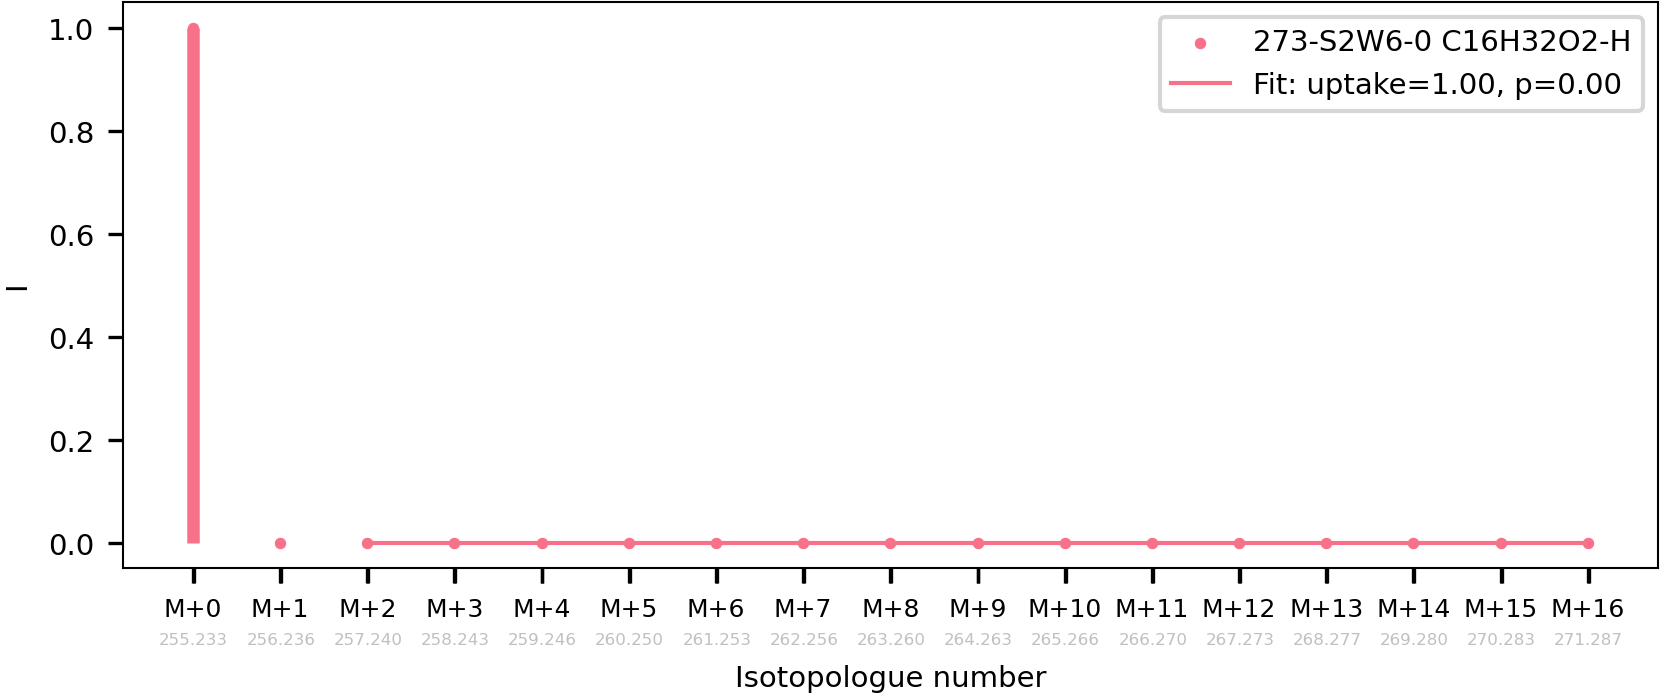

In [15]:
cell_idx = "273-S2W6-0"
ion = 'C16H32O2-H'
layer = "corr_norm"

iso_dist = np.array(get_iso_dist(adata, ion, cell_idx, layer))
x, n, param, success = fit_binomial(iso_dist, "C16")
print(param)

fig, ax = plt.subplots(1, 1, figsize=(x_width * 2, y_width))
ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax)
ax.plot(np.arange(0, n*2, 2)[1:], model_C16(param, n)[1:], label=f"Fit: uptake={param[0]:1.2f}, p={param[1]:1.2f}")
ax.legend()

[0.52176833 0.60710117]
9.405523657111788 0.6718231183651276


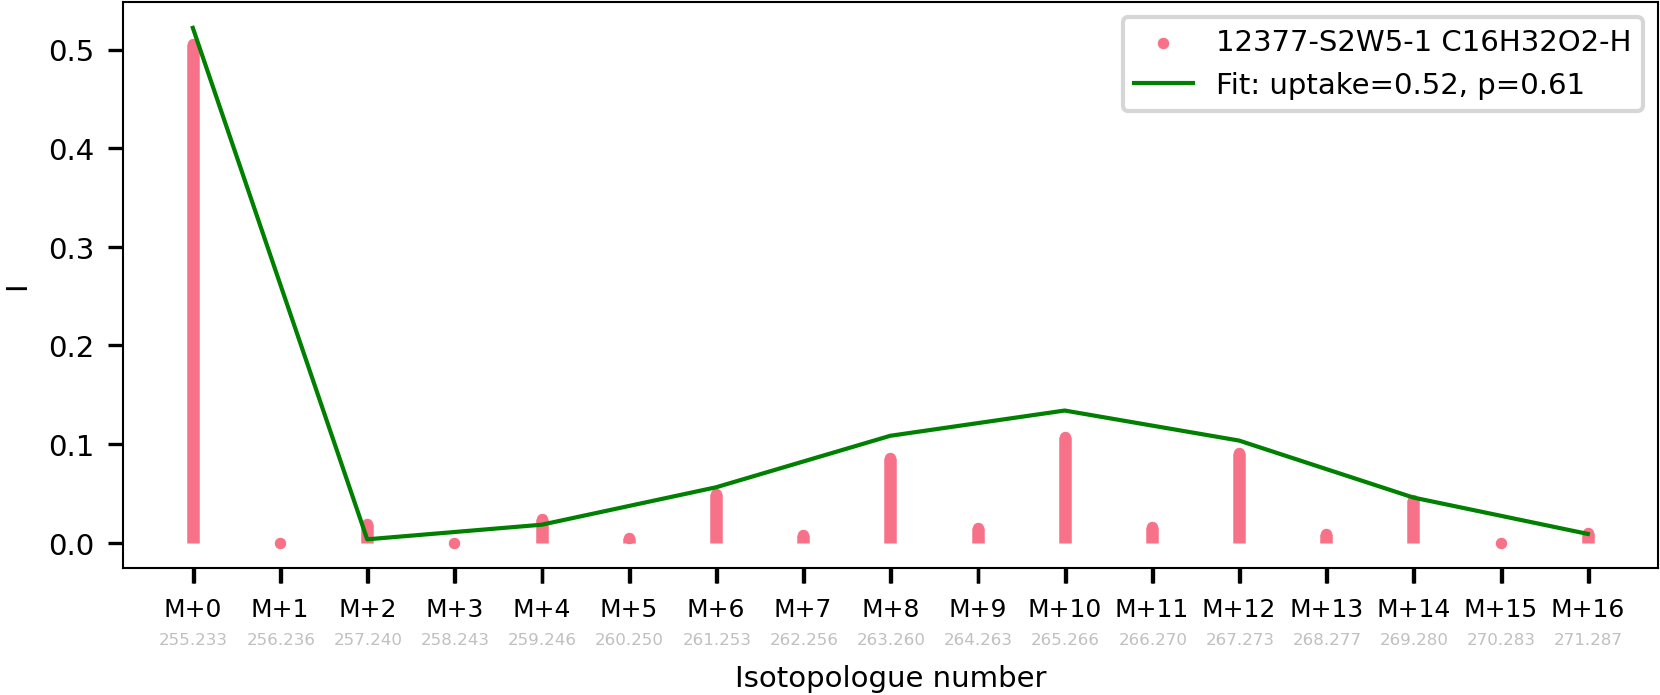

In [5]:
cell_idx = "12377-S2W5-1"
ion = 'C16H32O2-H'
layer = "corr_norm"

iso_dist = np.array(get_iso_dist(adata, ion, cell_idx, layer))
x, n, param, success = fit_binomial(iso_dist, "C16")
print(param)

iso_dist_even = iso_dist[2::2]
mean_M, mean_p = calculate_mean(iso_dist_even)
print(mean_M, mean_p)

fig, ax = plt.subplots(1, 1, figsize=(x_width * 2, y_width))
ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax)
ax.plot(np.arange(0, n*2, 2), model_C16(param, n), label=f"Fit: uptake={param[0]:1.2f}, p={param[1]:1.2f}", color="green")
ax.legend()
plt.savefig(plots_path / ("spectrum_example_%s_%s.png"%(cell_idx, ion)))
plt.savefig(plots_path / ("spectrum_example_%s_%s.svg"%(cell_idx, ion)))

[0.58352124 0.43456123]
7.1460477596118555 0.5104319828294183


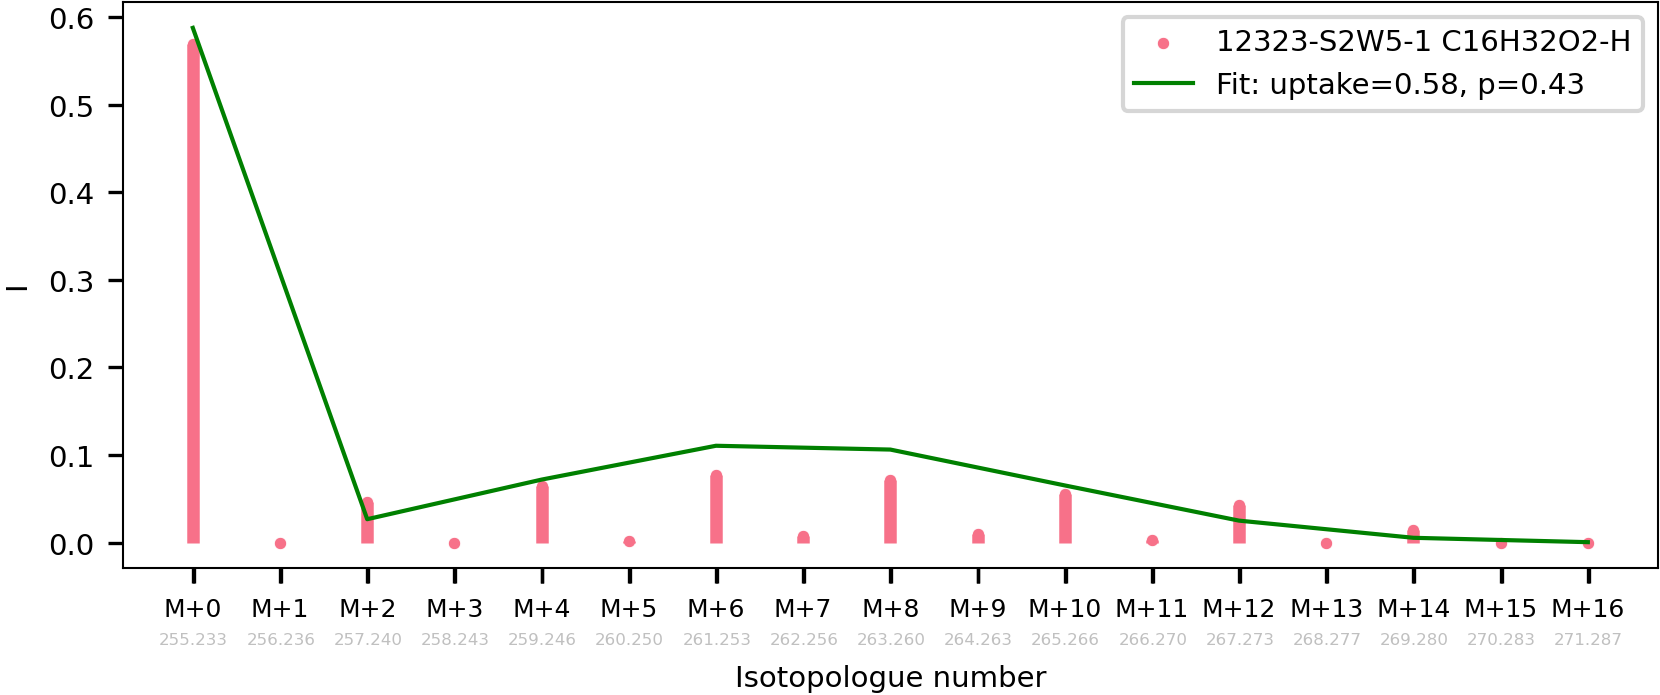

In [6]:
cell_idx = "12323-S2W5-1"
ion = 'C16H32O2-H'
layer = "corr_norm"

iso_dist = np.array(get_iso_dist(adata, ion, cell_idx, layer))
x, n, param, success = fit_binomial(iso_dist, "C16")
print(param)

iso_dist_even = iso_dist[2::2]
mean_M, mean_p = calculate_mean(iso_dist_even)
print(mean_M, mean_p)

fig, ax = plt.subplots(1, 1, figsize=(x_width * 2, y_width))
ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax)
ax.plot(np.arange(0, n*2, 2), model_C16(param, n), label=f"Fit: uptake={param[0]:1.2f}, p={param[1]:1.2f}", color="green")
ax.legend()
plt.savefig(plots_path / ("spectrum_example_%s_%s.png"%(cell_idx, ion)))
plt.savefig(plots_path / ("spectrum_example_%s_%s.svg"%(cell_idx, ion)))

### Plot two cells together

[0.52176833 0.60710117]
9.405523657111788 0.6718231183651276
[0.58352124 0.43456123]
7.1460477596118555 0.5104319828294183


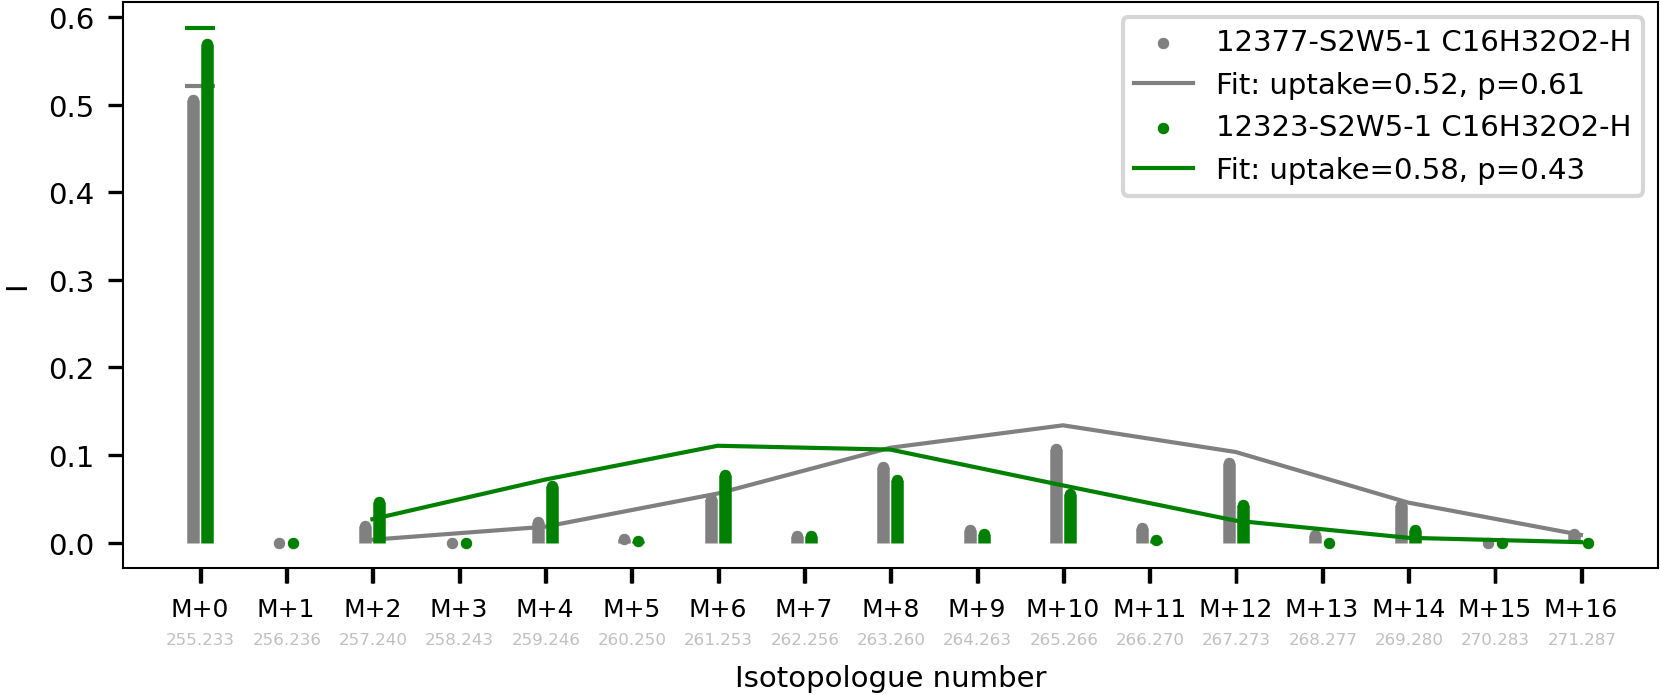

In [19]:
cell_idx = "12377-S2W5-1"
ion = 'C16H32O2-H'
layer = "corr_norm"

iso_dist = np.array(get_iso_dist(adata, ion, cell_idx, layer))
x, n, param, success = fit_binomial(iso_dist, "C16")
print(param)

iso_dist_even = iso_dist[2::2]
mean_M, mean_p = calculate_mean(iso_dist_even)
print(mean_M, mean_p)

fig, ax = plt.subplots(1, 1, figsize=(x_width * 2, y_width))
ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax, dx=-0.08)
ax.plot(np.arange(0, n*2, 2)[1:], model_C16(param, n)[1:], label=f"Fit: uptake={param[0]:1.2f}, p={param[1]:1.2f}", color="gray")
ax.scatter([0], model_C16(param, n)[0], marker="_", s=50, color="gray")
ax.legend()



cell_idx = "12323-S2W5-1"
ion = 'C16H32O2-H'
layer = "corr_norm"

iso_dist = np.array(get_iso_dist(adata, ion, cell_idx, layer))
x, n, param, success = fit_binomial(iso_dist, "C16")
print(param)

iso_dist_even = iso_dist[2::2]
mean_M, mean_p = calculate_mean(iso_dist_even)
print(mean_M, mean_p)

plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax, dx=0.08, color="green")
ax.plot(np.arange(0, n*2, 2)[1:], model_C16(param, n)[1:], label=f"Fit: uptake={param[0]:1.2f}, p={param[1]:1.2f}", color="green")
ax.scatter([0], model_C16(param, n)[0], marker="_", s=50, color="green")
ax.legend()

plt.savefig(plots_path / ("spectrum_example_together_%s_%s.png"%(cell_idx, ion)))
plt.savefig(plots_path / ("spectrum_example_together_%s_%s.svg"%(cell_idx, ion)))

In [51]:
adata.obs.loc[cell_idx, "C16H32O2-H_mean_p"]

0.5104319828294183

[0.62753206 0.54702159]


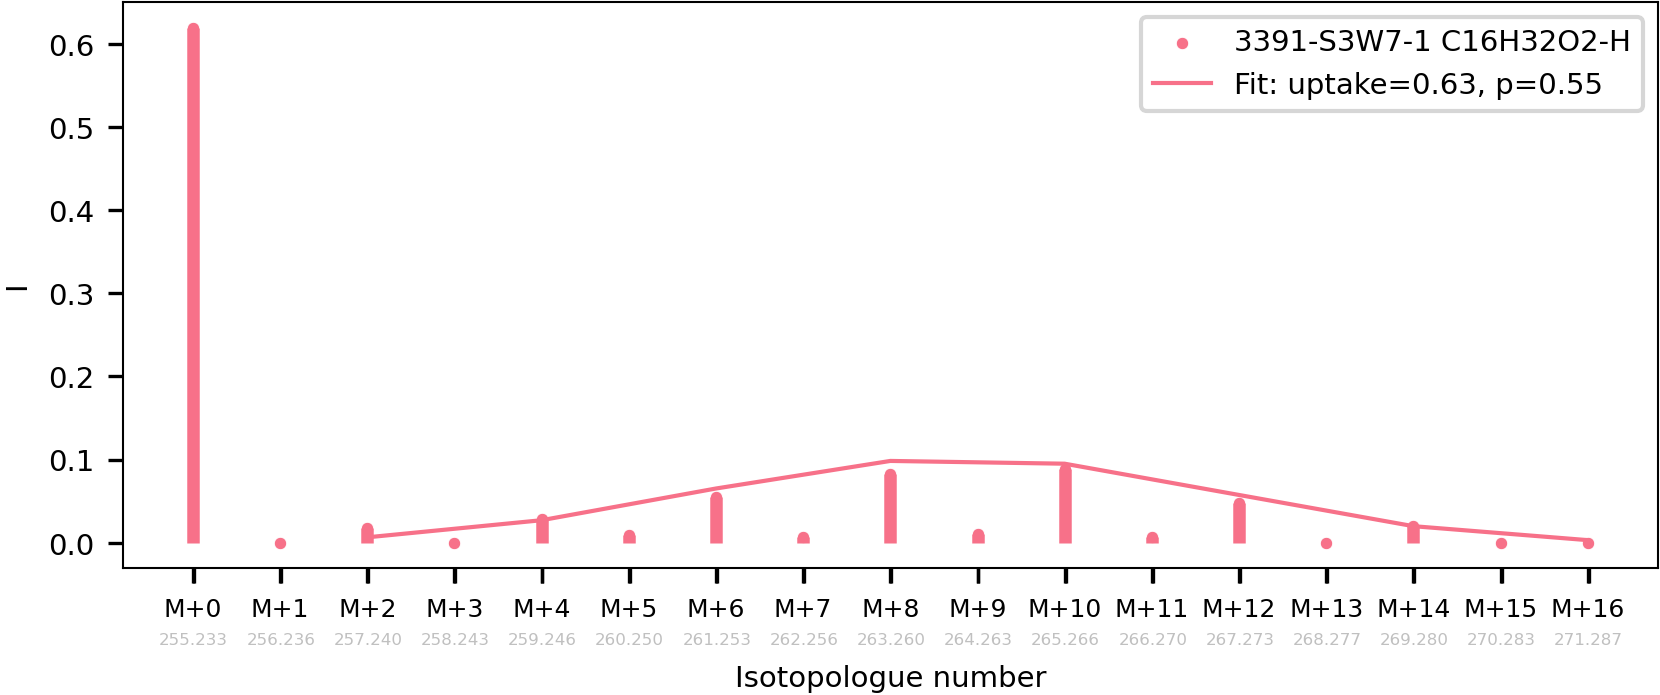

In [17]:
cell_idx = "3391-S3W7-1"
ion = 'C16H32O2-H'
layer = "corr_norm"

iso_dist = np.array(get_iso_dist(adata, ion, cell_idx, layer))
x, n, param, success = fit_binomial(iso_dist, "C16")
print(param)

fig, ax = plt.subplots(1, 1, figsize=(x_width * 2, y_width))
ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax)
ax.plot(np.arange(0, n*2, 2)[1:], model_C16(param, n)[1:], label=f"Fit: uptake={param[0]:1.2f}, p={param[1]:1.2f}")
ax.legend()

[0.91898817 0.25119118]


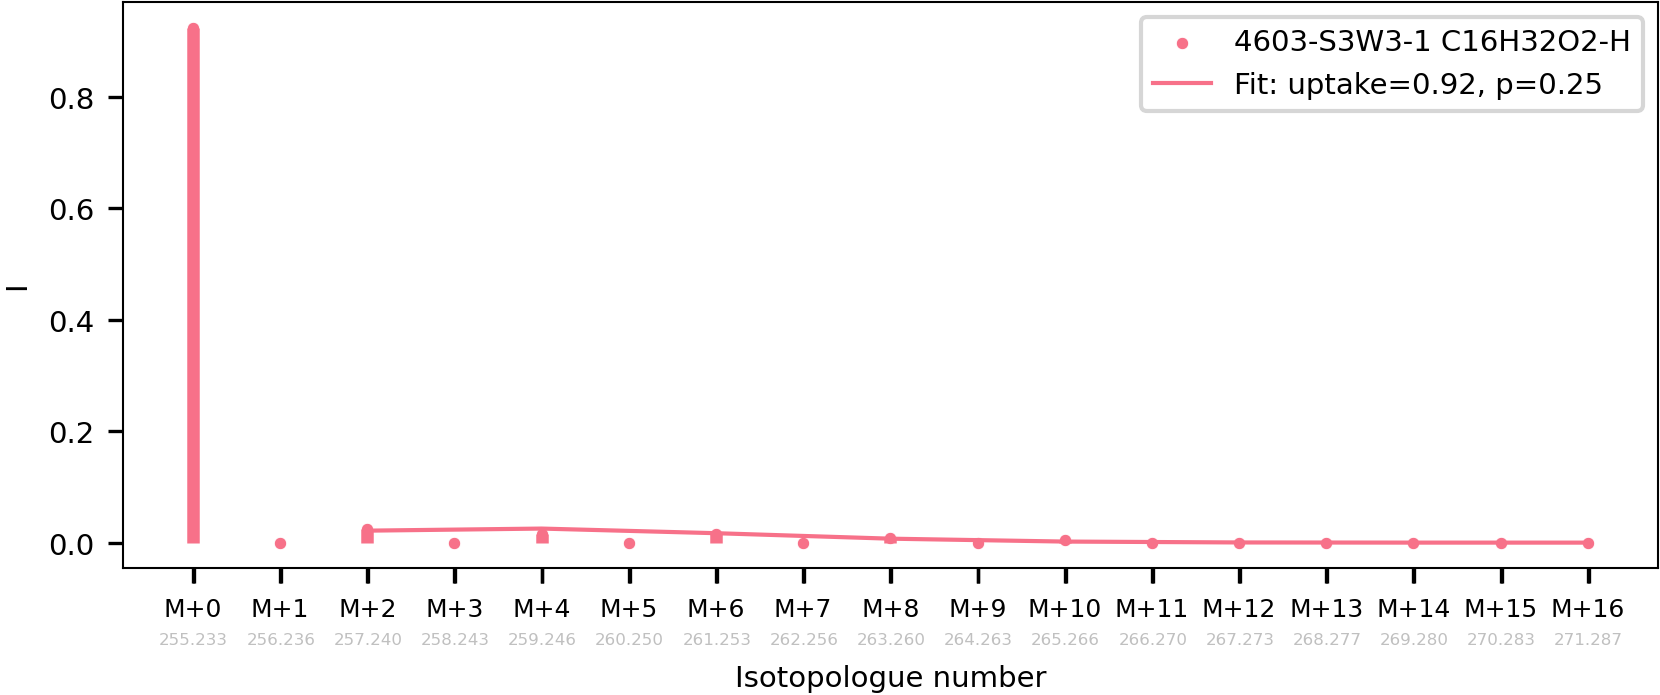

In [18]:
cell_idx = "4603-S3W3-1"
ion = 'C16H32O2-H'
layer = "corr_norm"

iso_dist = np.array(get_iso_dist(adata, ion, cell_idx, layer))
x, n, param, success = fit_binomial(iso_dist, "C16")
print(param)

fig, ax = plt.subplots(1, 1, figsize=(x_width * 2, y_width))
ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax)
ax.plot(np.arange(0, n*2, 2)[1:], model_C16(param, n)[1:], label=f"Fit: uptake={param[0]:1.2f}, p={param[1]:1.2f}")
ax.legend()

[0.91318135 0.07356816 0.02691774]


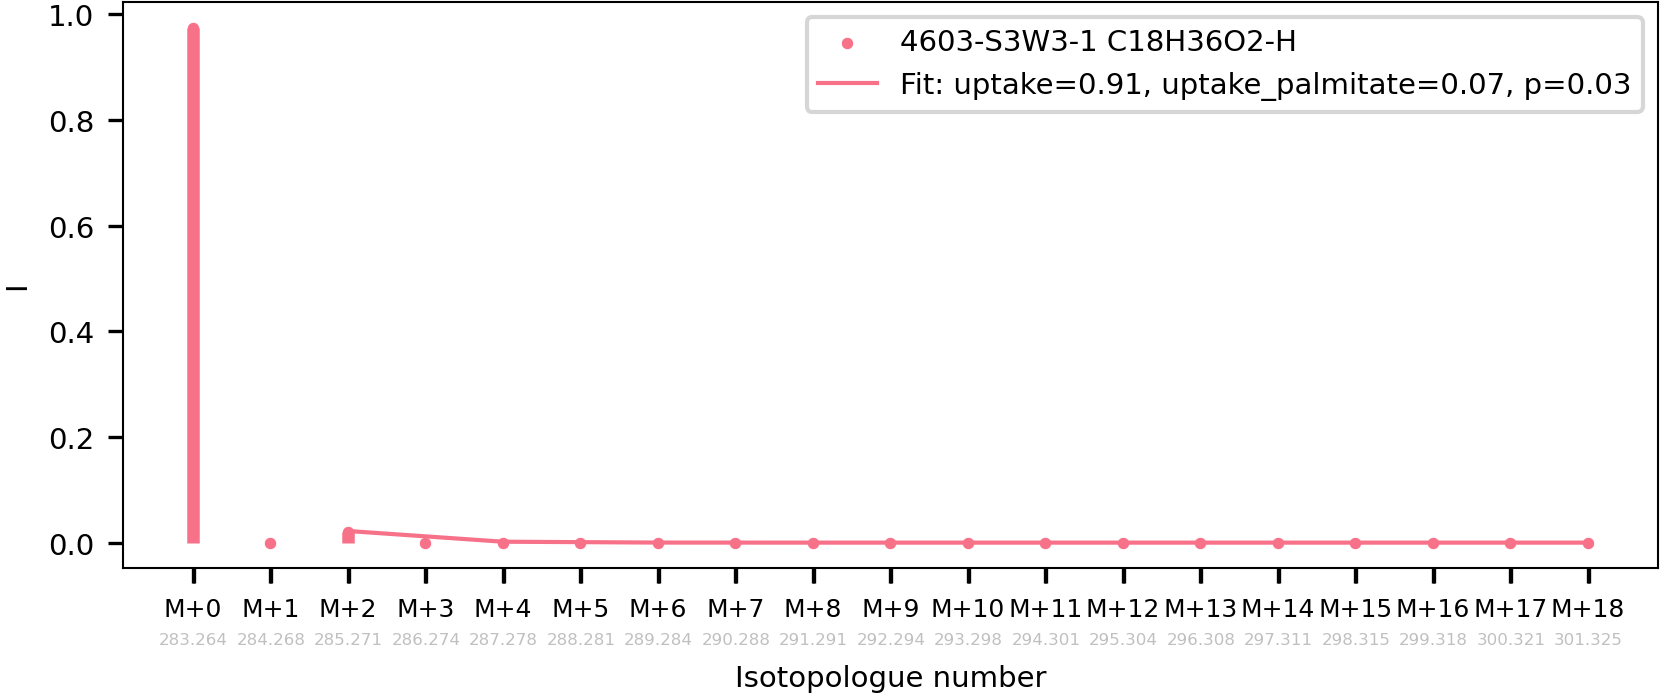

In [19]:
cell_idx = "4603-S3W3-1"
ion = 'C18H36O2-H'
layer = "corr_norm"

iso_dist = np.array(get_iso_dist(adata, ion, cell_idx, layer))
x, n, param, success = fit_binomial(iso_dist, "C18")
print(param)

fig, ax = plt.subplots(1, 1, figsize=(x_width * 2, y_width))
ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax)
ax.plot(np.arange(0, n*2, 2)[1:], model_C18(param, n)[1:], label=f"Fit: uptake={param[0]:1.2f}, uptake_palmitate={param[1]:1.2f}, p={param[2]:1.2f}")
ax.legend()

## Train classifier on uptake values to predict cell state

In [6]:
adata.obs.condition.value_counts()

ACLY Ol.1 + Wildtype      1598
Wildtype                  1346
ACLYkd Ol.2 + Wildtype    1296
ACLY Ol.1                 1180
ACLYkd Ol.2                837
Name: condition, dtype: int64

In [7]:
adata.obs["knockdown"] = adata.obs.condition.replace({"Wildtype": "Wildtype",
                                                      "ACLY Ol.1": "ACLYkd",
                                                      "ACLYkd Ol.2": "ACLYkd",
                                                      "ACLY Ol.1 + Wildtype": "ACLYkd + Wildtype",
                                                      "ACLYkd Ol.2 + Wildtype": "ACLYkd + Wildtype"})

### Separate wells (predict class assigned based on well's growth conditions)

In [8]:
adata_separate =  adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")]

In [9]:
adata_separate

View of AnnData object with n_obs × n_vars = 2539 × 87
    obs: 'center_x', 'center_y', 'cell_area', 'cell_sampling_area', 'cell_sampling_ratio', 'cell_nearest_am_distance', 'cell_nearest_cell_distance', 'centroid-0', 'centroid-1', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3', 'local_centroid-0', 'local_centroid-1', 'area', 'filled_area', 'solidity', 'perimeter', 'eccentricity', 'euler_number', 'moments_hu-0', 'moments_hu-1', 'moments_hu-2', 'moments_hu-3', 'moments_hu-4', 'moments_hu-5', 'moments_hu-6', 'moments_central-0-0', 'moments_central-0-1', 'moments_central-0-2', 'moments_central-0-3', 'moments_central-1-0', 'moments_central-1-1', 'moments_central-1-2', 'moments_central-1-3', 'moments_central-2-0', 'moments_central-2-1', 'moments_central-2-2', 'moments_central-2-3', 'moments_central-3-0', 'moments_central-3-1', 'moments_central-3-2', 'moments_central-3-3', 'inertia_tensor_eigvals-0', 'inertia_tensor_eigvals-1', 'major_axis_length', 'minor_axis_length', 'weighted_moments_central-0-0-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished
/home/buglakova/anaconda3/envs/sciso_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9908136482939632


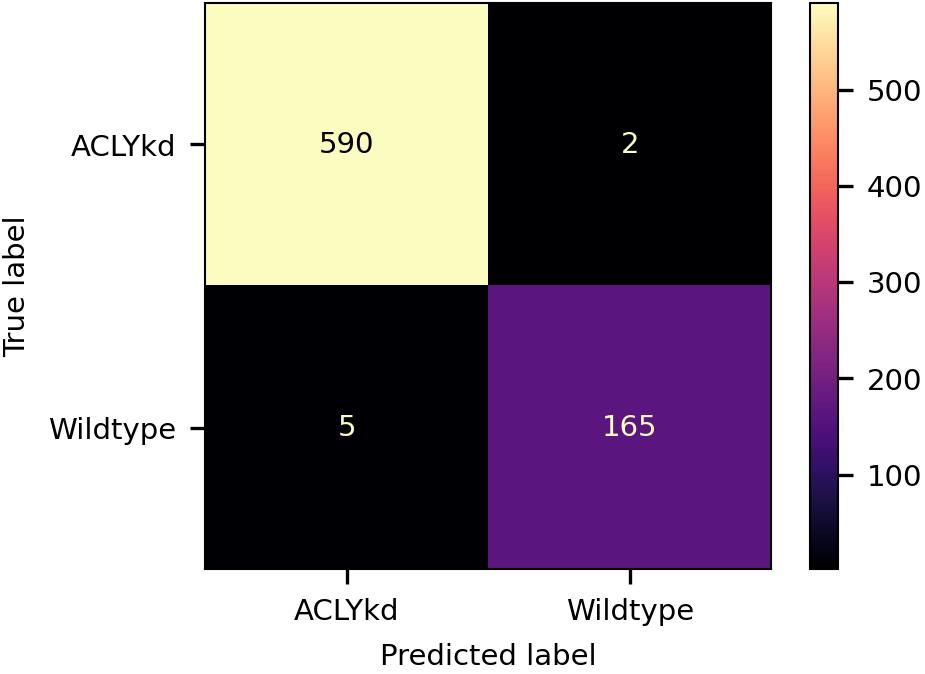

ROC AUC score:  0.9997317170111287


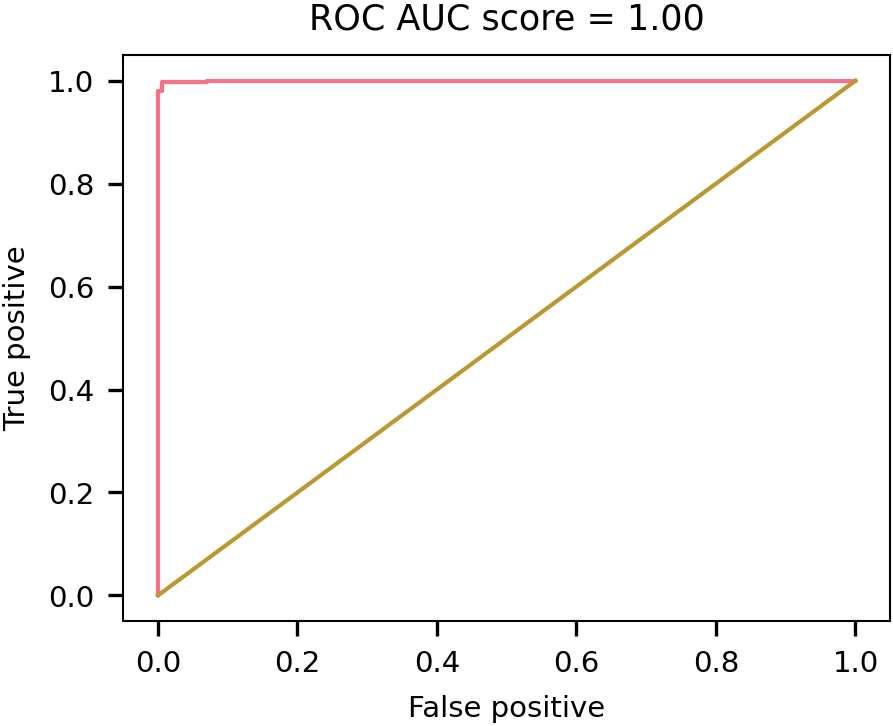

In [11]:
clf = train_classifier(adata_separate, "separate", "ACLYkd", plots_path, "knockdown")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished
/home/buglakova/anaconda3/envs/sciso_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.7913385826771654


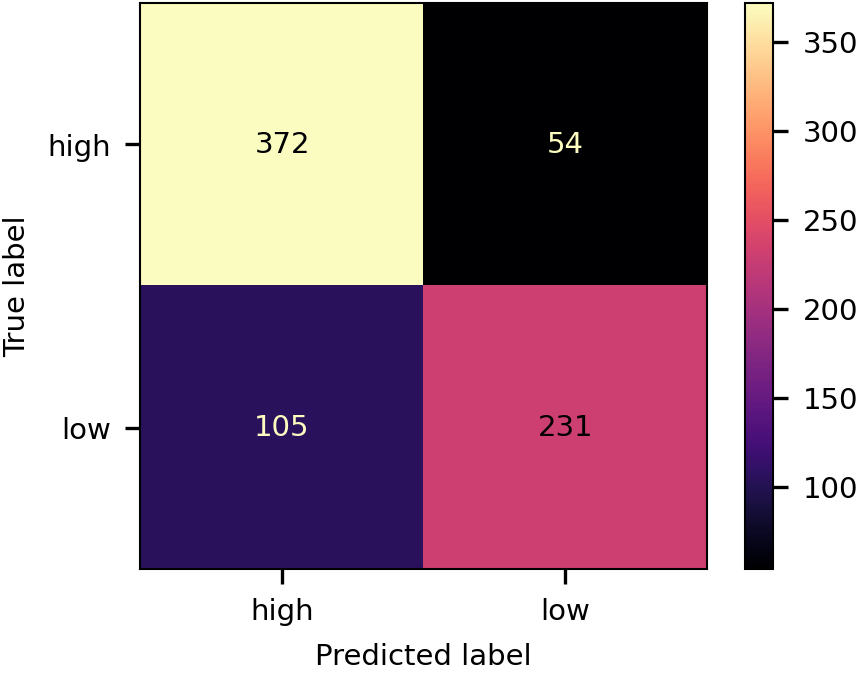

ROC AUC score:  0.8404873686563827


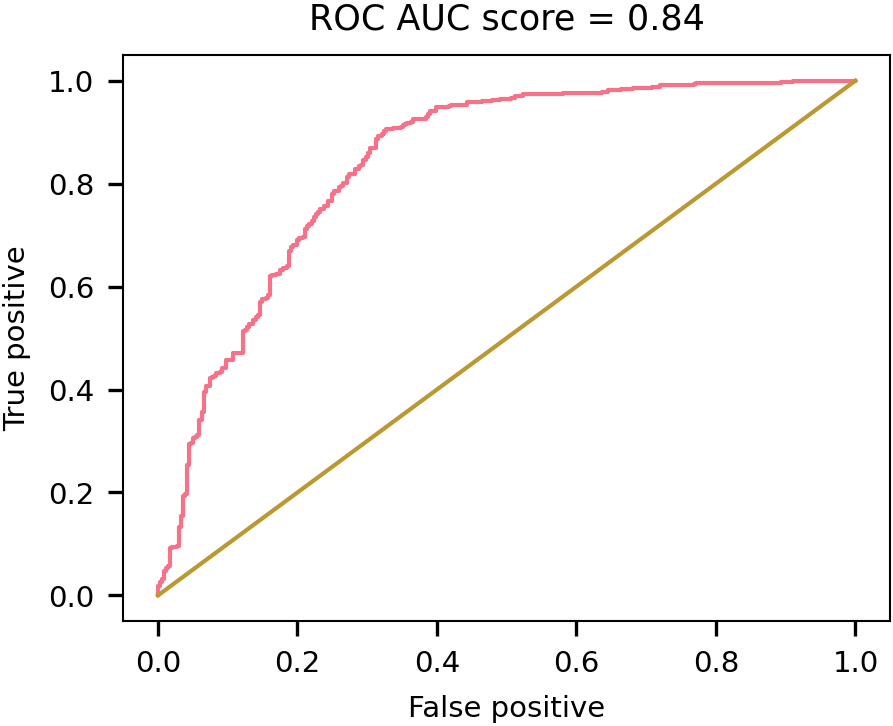

In [12]:
clf = train_classifier(adata_separate, "separate", "high", plots_path, 'assigned GFP class')

### Mixture (predict class assigned based on fluorescence)

In [13]:
adata_mix =  adata[(adata.obs.mixture == 1) & (adata.obs.growthConditions == "Labeled")]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished
/home/buglakova/anaconda3/envs/sciso_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.7974683544303798


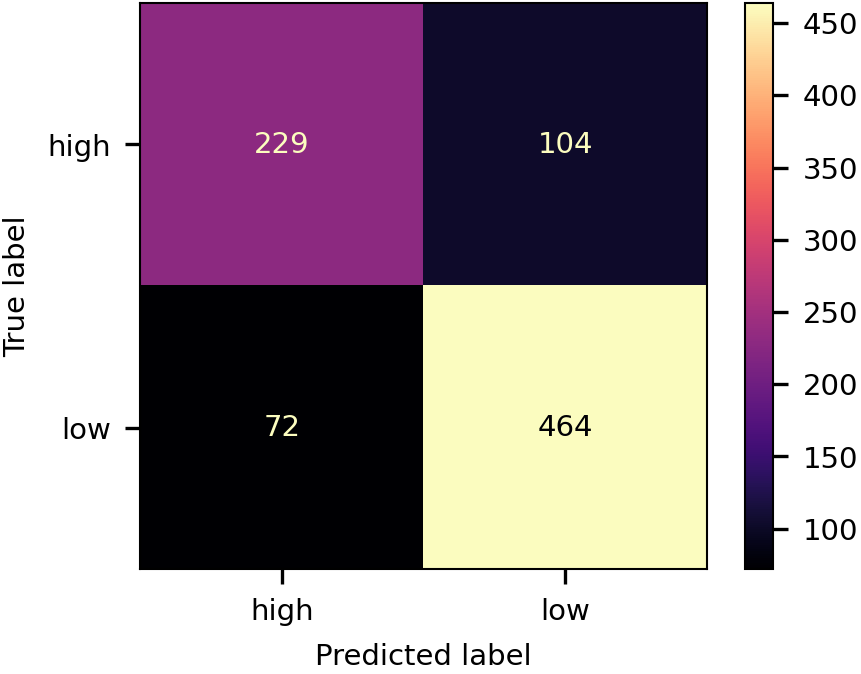

ROC AUC score:  0.8471717986643359


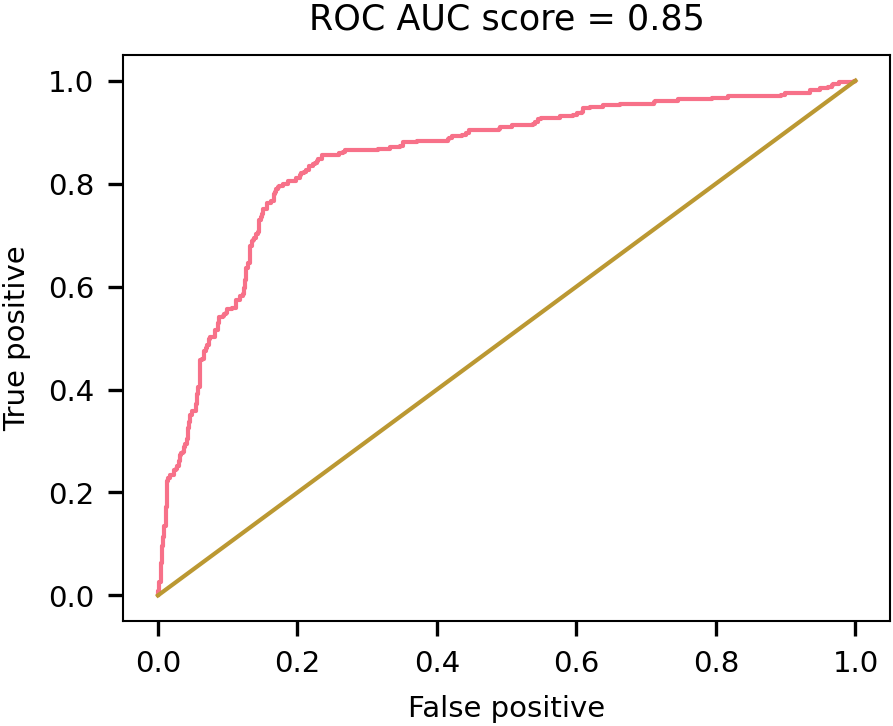

In [14]:
clf = train_classifier(adata_mix, "mix", "high", plots_path, 'assigned GFP class')

In [15]:
y_pred = clf.predict(adata.layers["corr_norm"])
adata.obs["gfp_class_prediction"] = y_pred
adata.obs["correct_prediction"] = (adata.obs['assigned GFP class'] == y_pred).astype(int)

In [16]:
output_file = anndata_dir / "aclykd_adata_concat_fit.h5ad"
adata.write(output_file.with_suffix(".h5ad"))

## Correlation between GFP intensity and AcCoA labeling

In [21]:
adata_kd = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled") & (adata.obs.knockdown == "ACLYkd")]

In [22]:
adata_kd

View of AnnData object with n_obs × n_vars = 2017 × 87
    obs: 'center_x', 'center_y', 'cell_area', 'cell_sampling_area', 'cell_sampling_ratio', 'cell_nearest_am_distance', 'cell_nearest_cell_distance', 'centroid-0', 'centroid-1', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3', 'local_centroid-0', 'local_centroid-1', 'area', 'filled_area', 'solidity', 'perimeter', 'eccentricity', 'euler_number', 'moments_hu-0', 'moments_hu-1', 'moments_hu-2', 'moments_hu-3', 'moments_hu-4', 'moments_hu-5', 'moments_hu-6', 'moments_central-0-0', 'moments_central-0-1', 'moments_central-0-2', 'moments_central-0-3', 'moments_central-1-0', 'moments_central-1-1', 'moments_central-1-2', 'moments_central-1-3', 'moments_central-2-0', 'moments_central-2-1', 'moments_central-2-2', 'moments_central-2-3', 'moments_central-3-0', 'moments_central-3-1', 'moments_central-3-2', 'moments_central-3-3', 'inertia_tensor_eigvals-0', 'inertia_tensor_eigvals-1', 'major_axis_length', 'minor_axis_length', 'weighted_moments_central-0-0-

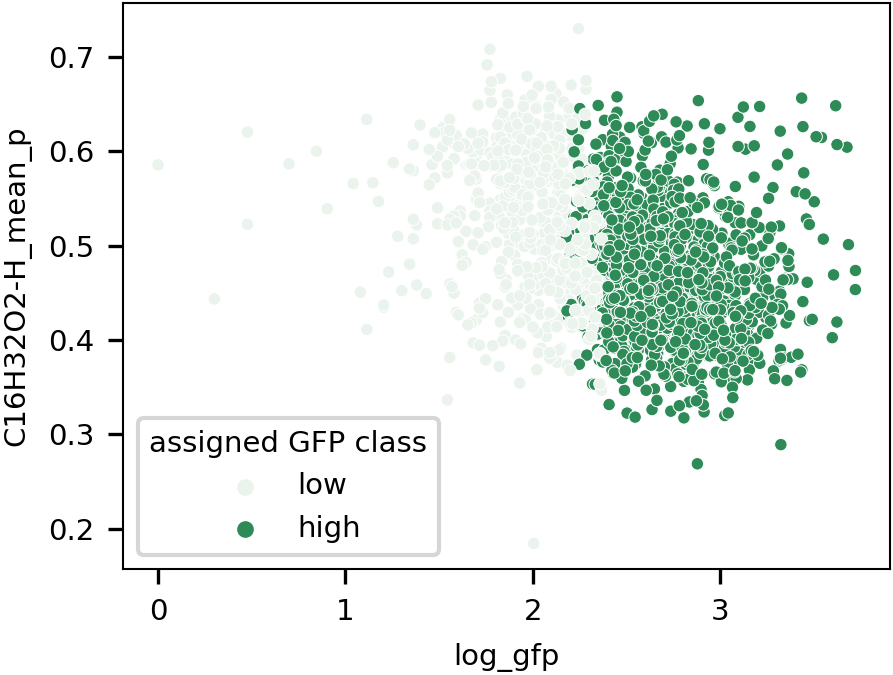

In [35]:
sns.scatterplot(data=adata_kd.obs, x="log_gfp", y='C16H32O2-H_mean_p', hue='assigned GFP class', palette=sns.light_palette("seagreen", 2), hue_order=["low", "high"])
plt.savefig(plots_path / ("acykd_mean_p_scatterplot.png"))
plt.savefig(plots_path / ("aclykd_mean_p_scatterplot.svg"))

In [36]:
np.corrcoef(adata_kd.obs["log_gfp"], adata_kd.obs['C16H32O2-H_mean_p'])

array([[ 1.        , -0.37164887],
       [-0.37164887,  1.        ]])

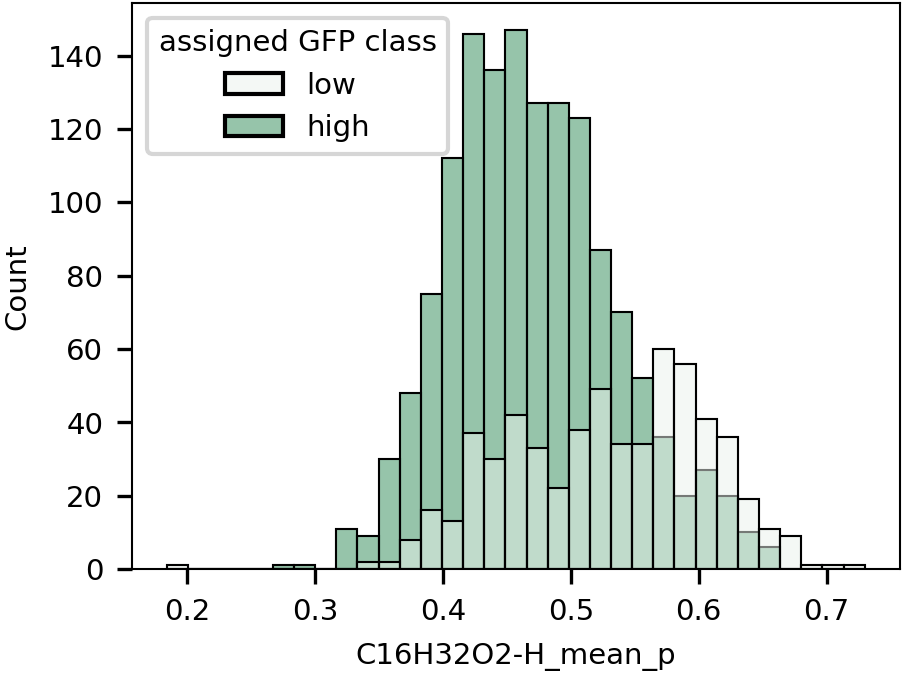

In [34]:
sns.histplot(data=adata_kd.obs, x='C16H32O2-H_mean_p', hue='assigned GFP class', palette=sns.light_palette("seagreen", 2), hue_order=["low", "high"])
plt.savefig(plots_path / ("acykd_mean_p_hist.png"))
plt.savefig(plots_path / ("aclykd_mean_p_hist.svg"))

<AxesSubplot:xlabel='log_gfp', ylabel='C18H36O2-H_mean_p'>

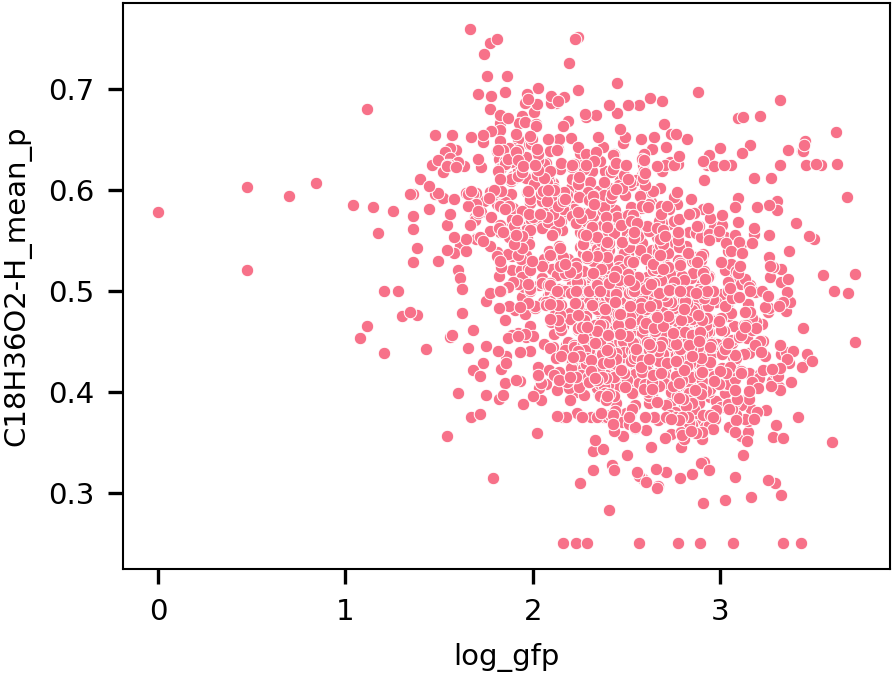

In [24]:
sns.scatterplot(data=adata_kd.obs, x="log_gfp", y='C18H36O2-H_mean_p')